***Credit EDA Case Study***

***Problem Statement***

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study. In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

***DATA***

For this case study, the below mentioed dataset has been provided: 

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.
2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.
3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

***Importing the libraries.***





In [5]:
#import warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
#import the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

%matplotlib inline

In [7]:
pwd

'C:\\Users\\ADMIN\\Desktop\\Upgrad\\Python\\EDA\\CreditEDA'

In [8]:
cd C:\\Users\\ADMIN\\Desktop\\Upgrad\\Python\\EDA\\CreditEDA

C:\Users\ADMIN\Desktop\Upgrad\Python\EDA\CreditEDA


In [9]:
pwd

'C:\\Users\\ADMIN\\Desktop\\Upgrad\\Python\\EDA\\CreditEDA'

# Application Data

## <font color =blue> Data Loading and Inspection

In [10]:
# Reading the csv file 'application_data.csv' using 'read_csv'
application_df=pd.read_csv('application_data.csv')

In [11]:
#Print the first five records of the application data.
application_df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Print the last five records of the application data.
application_df.tail(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


Data is correctly loaded. Now we will examine the shape of the applicaiton data

In [13]:
# Checking no. of rows and columns of dataframe
application_df.shape

(307511, 122)

There are total 307511 observations and 122 columns in Application Data CSV file.

In [14]:
# Check the column-wise info of the dataframe
application_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

data types look fine for all columns. NO Data type conversion will be required.

##  <font color =blue> Data Cleaning
### Duplicate values

In [15]:
application_df.drop_duplicates().shape

(307511, 122)

Tehere are no duplicates in a Application data CSV file.

### Missing Values

In [16]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [17]:
#To check missing values count
application_df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [18]:
# Checking % of missing values and correspinding columns where percentage is greater thatn 45

percent_missing = round(application_df.isnull().sum()/len(application_df)*100,2)
missing_value_df = pd.DataFrame({'column_name': application_df.columns, 'percent_missing': percent_missing})
missing_value_df[missing_value_df.percent_missing > 45]

,column_name,percent_missing
OWN_CAR_AGE,OWN_CAR_AGE,65.99
EXT_SOURCE_1,EXT_SOURCE_1,56.38
APARTMENTS_AVG,APARTMENTS_AVG,50.75
BASEMENTAREA_AVG,BASEMENTAREA_AVG,58.52
YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_AVG,48.78
YEARS_BUILD_AVG,YEARS_BUILD_AVG,66.50
COMMONAREA_AVG,COMMONAREA_AVG,69.87
ELEVATORS_AVG,ELEVATORS_AVG,53.30
ENTRANCES_AVG,ENTRANCES_AVG,50.35
FLOORSMAX_AVG,FLOORSMAX_AVG,49.76


In [19]:
missing_value_df[missing_value_df.percent_missing > 45].count()

column_name        49
percent_missing    49
dtype: int64

There are 49 columns columns which are having missing values more than 45 percent.

In [20]:
missing_value_df=missing_value_df.reset_index(drop=True)
missing_value_df.head(5)

,column_name,percent_missing
0,SK_ID_CURR,0.0
1,TARGET,0.0
2,NAME_CONTRACT_TYPE,0.0
3,CODE_GENDER,0.0
4,FLAG_OWN_CAR,0.0


In [21]:
# retrieving all columns names which are having null percentage greater than 45.
cols = missing_value_df[missing_value_df.percent_missing > 45].column_name
cols

21                     OWN_CAR_AGE
41                    EXT_SOURCE_1
44                  APARTMENTS_AVG
45                BASEMENTAREA_AVG
46     YEARS_BEGINEXPLUATATION_AVG
47                 YEARS_BUILD_AVG
48                  COMMONAREA_AVG
49                   ELEVATORS_AVG
50                   ENTRANCES_AVG
51                   FLOORSMAX_AVG
52                   FLOORSMIN_AVG
53                    LANDAREA_AVG
54            LIVINGAPARTMENTS_AVG
55                  LIVINGAREA_AVG
56         NONLIVINGAPARTMENTS_AVG
57               NONLIVINGAREA_AVG
58                 APARTMENTS_MODE
59               BASEMENTAREA_MODE
60    YEARS_BEGINEXPLUATATION_MODE
61                YEARS_BUILD_MODE
62                 COMMONAREA_MODE
63                  ELEVATORS_MODE
64                  ENTRANCES_MODE
65                  FLOORSMAX_MODE
66                  FLOORSMIN_MODE
67                   LANDAREA_MODE
68           LIVINGAPARTMENTS_MODE
69                 LIVINGAREA_MODE
70        NONLIVINGA

In [22]:
## columns 44 to 90 have data pertaining to details of living apartment / house of the applicant. These column has > 45% missing values 
#and hence can be dropped

application_df.drop(columns=(application_df.iloc[:, 44:91].columns), inplace=True)

application_df.shape 

(307511, 75)

In [23]:
# checking missing values again 
round(application_df.isnull().sum()/len(application_df)*100,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F

own_car_age and ext_source_1 are having missing values > 45 percentage. we need to handle missing values diffreent for these columns.

In [24]:
#checking 'OWN_CAR_AGE'
application_df[application_df['OWN_CAR_AGE'].isnull()].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,NaN,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


WE need to chech that only OWN_CAR_AGE is set to null for the clients who is not having the car. this can be be checked through the flag entry FLAG_OWN_CAR

In [25]:
application_df[(application_df['FLAG_OWN_CAR']=='N') & (application_df['OWN_CAR_AGE'].isnull()) & (application_df['TARGET']==1)][['TARGET','FLAG_OWN_CAR','OWN_CAR_AGE']].count()

TARGET          17249
FLAG_OWN_CAR    17249
OWN_CAR_AGE         0
dtype: int64

In [26]:
application_df[(application_df['FLAG_OWN_CAR']=='N') & (application_df['OWN_CAR_AGE'].isnull()) & (application_df['TARGET']==0)][['TARGET','FLAG_OWN_CAR','OWN_CAR_AGE']].count()

TARGET          185675
FLAG_OWN_CAR    185675
OWN_CAR_AGE          0
dtype: int64

There are 17249 clients had difficulties in paying the loan for whom not having own car and value is null.
There are 185675 clients had pain loan installments for whom not having own car and value is null.

In [27]:
application_df[(application_df['FLAG_OWN_CAR']=='Y') & (application_df['OWN_CAR_AGE'].isnull()) & (application_df['TARGET']==1)][['TARGET','FLAG_OWN_CAR','OWN_CAR_AGE']].count()

TARGET          0
FLAG_OWN_CAR    0
OWN_CAR_AGE     0
dtype: int64

There are no clients had difficulties in paying the loan for whom not having own car and value is null. with this analysis OWN_CAR_AGE is not having impact on TARGET field. this value can be filled with zero for null values.

In [28]:
#let's fill the null values with zero for OWN_CAR_AGE 
application_df['OWN_CAR_AGE'].fillna(0,inplace = True)

In [29]:
#CHECKING NULL values
application_df['OWN_CAR_AGE'].isnull().sum()

0

CHECKING 'EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3' separates has EXT_SOURCE_1 having null value percentage > 45.

In [30]:
np.round(application_df[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].describe(),2)

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,134133.00,306851.00,246546.00
mean,0.50,0.51,0.51
std,0.21,0.19,0.19
min,0.01,0.00,0.00
25%,0.33,0.39,0.37
50%,0.51,0.57,0.54
75%,0.68,0.66,0.67
max,0.96,0.85,0.90


EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3 are normalized scores received from external data source. out of these three sources, we had received 95 percent of data from source 2. and other sources are having more null values. hence keeping only EXT_SOURCE_2 DATA.

In [31]:
application_df.drop(columns=['EXT_SOURCE_3','EXT_SOURCE_1'], inplace = True)
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,0.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,0.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,0.0,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,0.0,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
# checking missing values 
nrows, ncols = application_df.shape
null_df = (application_df.isnull().sum() * 100 / nrows).round(2)
null_df[null_df != 0].sort_values(ascending=False)

OCCUPATION_TYPE               31.35
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
DEF_60_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
dtype: float64

Occupation type has 31% data missing, Columns AMT_REQ_CREDIT_BUREAU refers to this financial company or any other company which may have hit Bureau to
check applicant's credit score. This indicates:
1. How many places is the applicant looking for loan parallely. 
2. How many such applications or loans were applied for and/or taken in last one yaer
This is an important indicator
NaN can either signify connection between our Server and Bureau failed or the applicant has not got any loans . however percentage of missigng data is less, hence deleting those records.

In [32]:
#drop the records with AMT_REQ_CREDIT_BUREAU_YEAR missings in inp1.
application_df = application_df[~application_df['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull()]

In [33]:
application_df = application_df[~application_df['AMT_REQ_CREDIT_BUREAU_QRT'].isnull()]

In [34]:
application_df = application_df[~application_df['AMT_REQ_CREDIT_BUREAU_MON'].isnull()]

In [35]:
application_df = application_df[~application_df['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull()]

In [36]:
application_df = application_df[~application_df['AMT_REQ_CREDIT_BUREAU_DAY'].isnull()]

In [37]:
application_df = application_df[~application_df['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull()]

In [38]:
nrows, ncols = application_df.shape
null_df = (application_df.isnull().sum() * 100 / nrows).round(2)
null_df[null_df != 0].sort_values(ascending=False)

OCCUPATION_TYPE             31.27
NAME_TYPE_SUITE              0.44
DEF_60_CNT_SOCIAL_CIRCLE     0.32
OBS_60_CNT_SOCIAL_CIRCLE     0.32
DEF_30_CNT_SOCIAL_CIRCLE     0.32
OBS_30_CNT_SOCIAL_CIRCLE     0.32
EXT_SOURCE_2                 0.20
AMT_GOODS_PRICE              0.09
dtype: float64

# Handling missing values in 'AMT_GOODS_PRICE'

In [39]:
#checking 'AMT_GOODS_PRICE'

application_df[application_df['AMT_GOODS_PRICE'].isnull()].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500.0,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,0.010006,-11993,-2921,-1289.0,-1948,0.0,1,1,1,1,1,1,Private service staff,2.0,2,2,SATURDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.464614,0.0,0.0,0.0,0.0,-476.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000.0,NaN,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,0.011657,-11079,-899,-3765.0,-572,0.0,1,1,1,1,1,0,Managers,3.0,1,1,WEDNESDAY,11,0,0,0,0,0,0,Government,0.645519,1.0,0.0,1.0,0.0,-1292.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500.0,NaN,NaN,Working,Higher education,Single / not married,House / apartment,0.032561,-9986,-1847,-4762.0,-506,0.0,1,1,1,1,1,0,Security staff,1.0,1,1,SATURDAY,18,0,0,0,0,0,0,Construction,0.552557,1.0,0.0,1.0,0.0,-159.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
7880,109190,1,Revolving loans,F,N,N,0,121500.0,270000.0,13500.0,NaN,NaN,Working,Higher education,Single / not married,With parents,0.006296,-12390,-640,-6365.0,-3597,0.0,1,1,0,1,1,0,Managers,1.0,3,3,FRIDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.407925,2.0,0.0,1.0,0.0,-158.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
7995,109322,0,Revolving loans,M,N,Y,0,112500.0,180000.0,9000.0,NaN,NaN,Working,Secondary / secondary special,Single / not married,House / apartment,0.008230,-12420,-1610,-6443.0,-2463,0.0,1,1,0,1,1,0,Security staff,1.0,2,2,THURSDAY,16,0,1,1,1,1,1,Security,0.078597,3.0,0.0,3.0,0.0,-2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,3.0


All rows with AMT_GOODS_PRICE NaN is for NAME_CONTRACT_TYPE - "Revolving Lons" . Revolving loans are GENERALLY not for purchasing any partiuclar item. Hence these values are NaN. Can be convereted to 0, as there are no good purchased. #This code can be used.

In [40]:
application_df['AMT_GOODS_PRICE'].fillna(value=0, inplace=True)

In [41]:
application_df['AMT_GOODS_PRICE'].isnull().sum()

0

# Handling missing values in 'OCCUPATION_TYPE'

In [42]:
application_df[application_df['OCCUPATION_TYPE'].isnull()]['NAME_INCOME_TYPE'].value_counts()

Pensioner               47710
Working                 21473
Commercial associate    10600
State servant            3375
Unemployed                  5
Student                     5
Businessman                 1
Name: NAME_INCOME_TYPE, dtype: int64

In [259]:
#checking 'OCCUPATION_TYPE' value_counts
application_df['OCCUPATION_TYPE'].value_counts(dropna=False)

NaN                      83169
Laborers                 47398
Sales staff              26905
Core staff               24393
Managers                 19188
Drivers                  15975
High skill tech staff    10028
Accountants               8766
Medicine staff            7710
Security staff            5709
Cooking staff             5098
Cleaning staff            3962
Private service staff     2228
Low-skill Laborers        1617
Secretaries               1144
Waiters/barmen staff      1107
Realty agents              630
HR staff                   503
IT staff                   462
Name: OCCUPATION_TYPE, dtype: int64

In [43]:
#checking 'OCCUPATION_TYPE' value_counts where 'NAME_INCOME_TYPE'  has value "Pensioner"

application_df[application_df['NAME_INCOME_TYPE']=='Pensioner']['OCCUPATION_TYPE'].value_counts()

Cleaning staff    2
Laborers          1
Medicine staff    1
Sales staff       1
Name: OCCUPATION_TYPE, dtype: int64

'OCCUPATION_TYPE' field is not a mandatory field. Hence many applicants have not updated the data for OCCUPATION_TYPE. we can leave the null values.

In [44]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,0.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,0.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,0.0,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,0.0,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [45]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,0.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,0.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,0.0,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,0.0,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


#### COMBINING COLUMNS  - DOCUMENT TYPES
Adding all document types and retaining only the sum column

In [46]:
application_df['NUM_DOCS'] = application_df['FLAG_DOCUMENT_2'] + application_df['FLAG_DOCUMENT_3'] + application_df['FLAG_DOCUMENT_4'] + application_df['FLAG_DOCUMENT_5']
+ application_df['FLAG_DOCUMENT_6'] + application_df['FLAG_DOCUMENT_7'] + application_df['FLAG_DOCUMENT_8'] + application_df['FLAG_DOCUMENT_9'] + application_df['FLAG_DOCUMENT_10']
+ application_df['FLAG_DOCUMENT_11'] + application_df['FLAG_DOCUMENT_12'] + application_df['FLAG_DOCUMENT_13'] + application_df['FLAG_DOCUMENT_14'] + application_df['FLAG_DOCUMENT_15']
+ application_df['FLAG_DOCUMENT_16'] + application_df['FLAG_DOCUMENT_17'] + application_df['FLAG_DOCUMENT_18'] + application_df['FLAG_DOCUMENT_19'] + application_df['FLAG_DOCUMENT_20']
+ application_df['FLAG_DOCUMENT_21']



application_df.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
            'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',
            'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
            'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],axis=1,inplace=True)

In [47]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NUM_DOCS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,0.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,0.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,0.0,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,0.0,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [48]:
# Converting Days to Years
application_df['YRS_AGE'] = application_df['DAYS_BIRTH'].floordiv(-365)
application_df.drop(['DAYS_BIRTH'],
         axis=1,inplace=True)

application_df.shape

(265992, 54)

In [49]:
#Checking again which all columns  have Null values

application_df.columns[application_df.isnull().any()].tolist()

['AMT_ANNUITY',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

All above missing values are being left with NaN values as instructed

## <font color=blue> Univariate Analysis
### Categorical Nominal

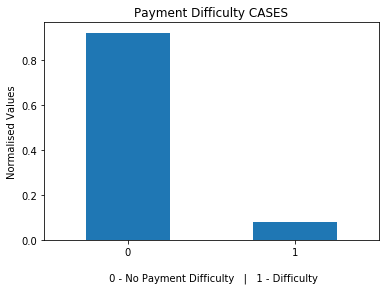

In [50]:
application_df.TARGET.value_counts(normalize=True).plot.bar()
plt.title("Payment Difficulty CASES")
plt.xlabel("\n 0 - No Payment Difficulty   |   1 - Difficulty")
plt.xticks(rotation =0)
plt.ylabel("Normalised Values")
plt.show()

In [51]:
#checking exact Target 0 to Target 1 ratio|
application_df[application_df.TARGET==0].shape[0]/application_df[application_df.TARGET==1].shape[0]

11.954366142307505

Inference : 1 in every ~12 applicant has payment difficulty. 
DATA IMBALANCE DETECTED

Cash loans         0.906016
Revolving loans    0.093984
Name: NAME_CONTRACT_TYPE, dtype: float64


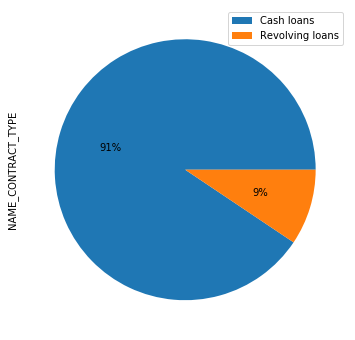

F      0.662667
M      0.337318
XNA    0.000015
Name: CODE_GENDER, dtype: float64


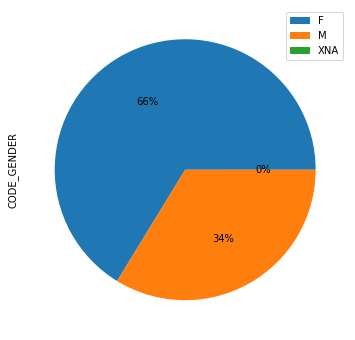

N    0.652001
Y    0.347999
Name: FLAG_OWN_CAR, dtype: float64


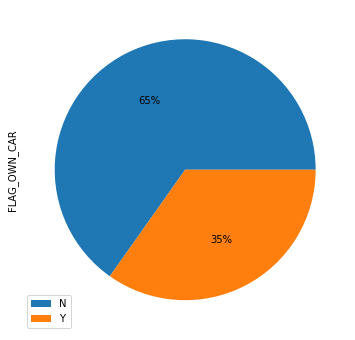

Y    0.690246
N    0.309754
Name: FLAG_OWN_REALTY, dtype: float64


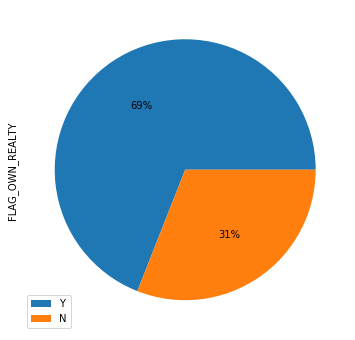

Unaccompanied      0.810483
Family             0.129417
Spouse, partner    0.036163
Children           0.010451
Other_B            0.005519
NaN                0.004448
Other_A            0.002669
Group of people    0.000850
Name: NAME_TYPE_SUITE, dtype: float64


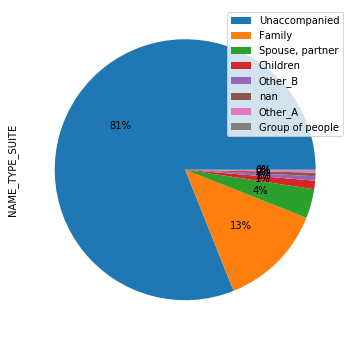

Working                 0.514854
Commercial associate    0.232360
Pensioner               0.179385
State servant           0.073307
Student                 0.000056
Unemployed              0.000019
Businessman             0.000015
Maternity leave         0.000004
Name: NAME_INCOME_TYPE, dtype: float64


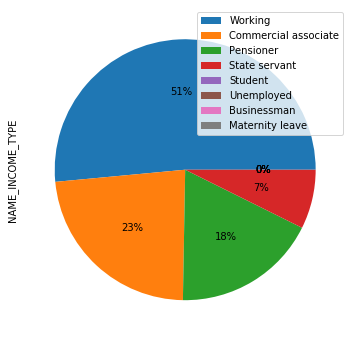

Secondary / secondary special    0.705337
Higher education                 0.249970
Incomplete higher                0.032324
Lower secondary                  0.011827
Academic degree                  0.000541
Name: NAME_EDUCATION_TYPE, dtype: float64


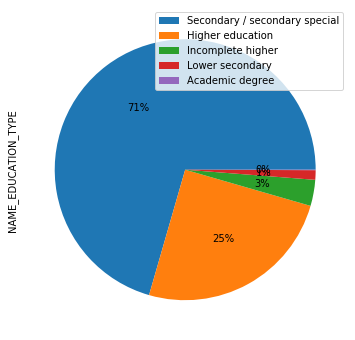

Married                 0.647132
Single / not married    0.141459
Civil marriage          0.093890
Separated               0.065224
Widow                   0.052291
Unknown                 0.000004
Name: NAME_FAMILY_STATUS, dtype: float64


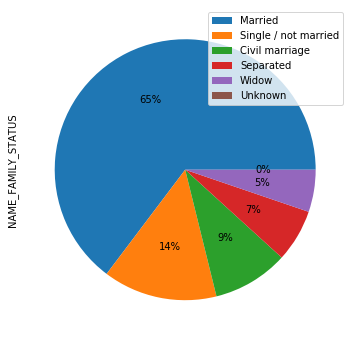

House / apartment      0.890741
With parents           0.045900
Municipal apartment    0.036106
Rented apartment       0.014925
Office apartment       0.008598
Co-op apartment        0.003729
Name: NAME_HOUSING_TYPE, dtype: float64


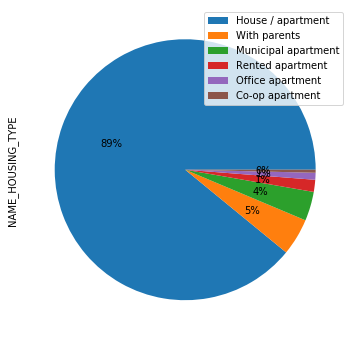

NaN                      0.312675
Laborers                 0.178193
Sales staff              0.101150
Core staff               0.091706
Managers                 0.072138
Drivers                  0.060058
High skill tech staff    0.037700
Accountants              0.032956
Medicine staff           0.028986
Security staff           0.021463
Cooking staff            0.019166
Cleaning staff           0.014895
Private service staff    0.008376
Low-skill Laborers       0.006079
Secretaries              0.004301
Waiters/barmen staff     0.004162
Realty agents            0.002368
HR staff                 0.001891
IT staff                 0.001737
Name: OCCUPATION_TYPE, dtype: float64


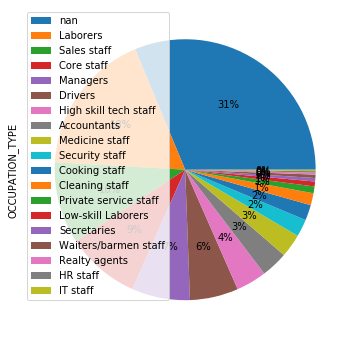

WEDNESDAY    0.172080
TUESDAY      0.170671
FRIDAY       0.165606
THURSDAY     0.165264
MONDAY       0.162753
SATURDAY     0.111909
SUNDAY       0.051716
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


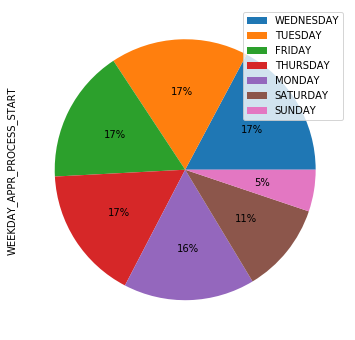

Business Entity Type 3    0.219544
XNA                       0.179370
Self-employed             0.120007
Other                     0.054396
Medicine                  0.037911
Business Entity Type 2    0.035554
Government                0.034824
School                    0.030035
Trade: type 7             0.024576
Kindergarten              0.023155
Construction              0.021463
Business Entity Type 1    0.019813
Transport: type 4         0.017643
Industry: type 9          0.011512
Trade: type 3             0.011207
Industry: type 3          0.010711
Security                  0.010572
Housing                   0.009760
Military                  0.008884
Industry: type 11         0.008872
Bank                      0.008523
Police                    0.008079
Transport: type 2         0.007699
Agriculture               0.007590
Postal                    0.006925
Security Ministries       0.006872
Trade: type 2             0.005850
Restaurant                0.005643
Services            

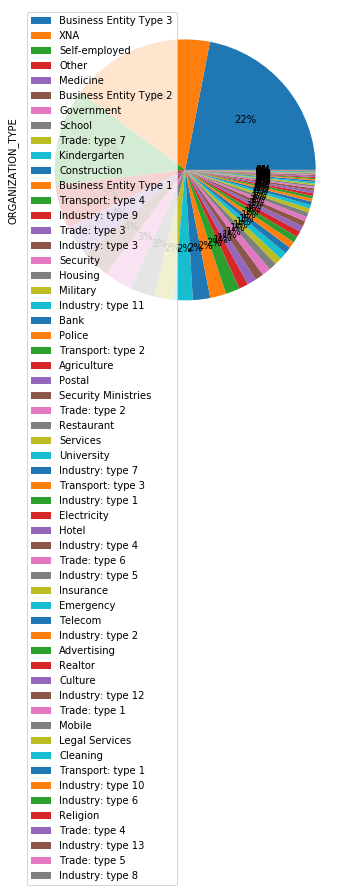

In [52]:
#Checking all object types Variables and their values

for i in application_df.columns:
    if application_df[i].dtypes=="object":
        print(application_df[i].value_counts(normalize=True, dropna= False))
        plt.figure(figsize=[6,6])
        application_df[i].value_counts(normalize=True, dropna=False).plot.pie(autopct='%1.f%%',labeldistance=None)
        plt.legend()
        plt.show()

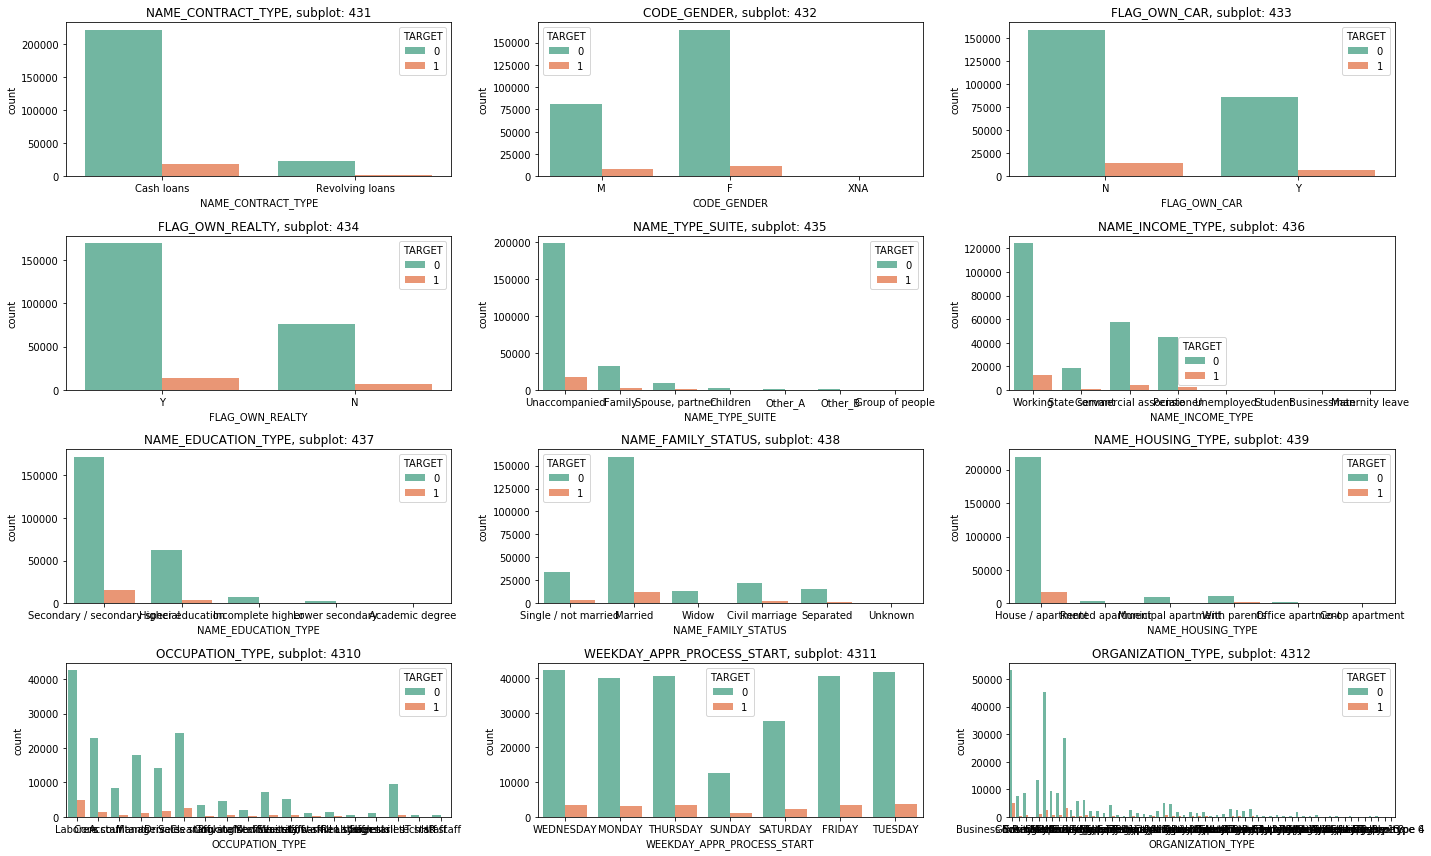

In [55]:
#  Object Data
m = 4  # number of rows
n = 3  # number of columns
q = 1  # initialize plot counter

fig = plt.figure(figsize=(20,12))

for i in application_df.columns:
    if application_df[i].dtypes=="object":

        plt.subplot(m, n, q)
        plt.title('{}, subplot: {}{}{}'.format(i, m, n, q))
        plt.xlabel(i)
        sns.countplot(application_df[i],hue = application_df.TARGET,palette="Set2")
        q = q + 1

fig.tight_layout()
plt.show()

##### **Few notable points**
1. Cash loans offered are more than revolving loans, at 90%
2. 65% Females have taken loans in comparison to 34% male. <font color = blue > This is very interesting and needs to be studied further </font>
3. 65% applicant dont own cars
4. 69% applicants own living quarters
5. 81% applicants came accompanied for loan application
6. While most applicants are working class, 18% are pensioners
7. 71% have secondary education
8. 63% are married
9. 31% have not mentioned their occupation type
    

In [56]:
application_df['FLAG_OWN_CAR'].value_counts()

N    173427
Y     92565
Name: FLAG_OWN_CAR, dtype: int64

In [57]:
#FLAG_OWN_CAR' & 'FLAG_OWN_REALTY' needs to be changed to Binary from yes/no

application_df['OWN_CAR_flag']=np.where(application_df.FLAG_OWN_CAR =="Y",1,0)
application_df['OWN_REALTY_flag']= np.where(application_df.FLAG_OWN_REALTY =="Y",1,0)
application_df['OWN_CAR_flag'].value_counts()

0    173427
1     92565
Name: OWN_CAR_flag, dtype: int64

In [58]:
application_df.OWN_REALTY_flag.dtype

dtype('int32')

### Numerical Variable

In [59]:
application_df.columns[application_df.dtypes=="int64"].tolist()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'NUM_DOCS',
 'YRS_AGE']

In [60]:
# Binning AGE and Creating new column "AGE_GROUP"

application_df['AGE_GROUP']= pd.cut(application_df.YRS_AGE,bins=[15,25,35,45,55,65,75])

application_df['AGE_GROUP'].value_counts(normalize=True)

(35, 45]    0.278689
(25, 35]    0.244936
(45, 55]    0.227236
(55, 65]    0.187806
(15, 25]    0.045377
(65, 75]    0.015955
Name: AGE_GROUP, dtype: float64

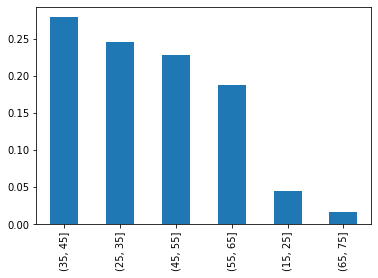

In [61]:
application_df['AGE_GROUP'].value_counts(normalize=True).plot.bar()
plt.show()

Inference - 35-45 Age group is the largest Group of Age applying for loans. This may be attributed to consumerism aspect at that age.

In [62]:
# Binning 'AMT_INCOME_TOTAL' and Creating new column "INCOME_GROUP"

application_df['INCOME_GROUP']= pd.qcut(application_df['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])

application_df['INCOME_GROUP'].value_counts(normalize=True)

Medium      0.291163
High        0.234759
Low         0.212521
VeryHigh    0.160460
VeryLow     0.101097
Name: INCOME_GROUP, dtype: float64

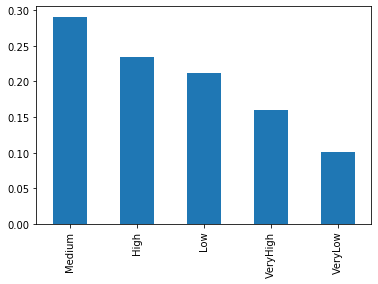

In [63]:
application_df['INCOME_GROUP'].value_counts(normalize=True).plot.bar()
plt.show()

Medium Income group is the largest Group applying for loans.

##### **Data Correction and Standardization**

In [64]:
#DAYS_REGISTRATION, DAYS_ID_PUBLISH to +ve numbers and change to years. Columns Renamed


application_df.DAYS_REGISTRATION = application_df.DAYS_REGISTRATION.apply(lambda x: abs(x//365.25))
application_df.DAYS_ID_PUBLISH = application_df.DAYS_ID_PUBLISH.apply(lambda x: abs(x//365.25))
application_df.rename({'DAYS_REGISTRATION':'YEARS_REGISTRATION', 'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, axis=1, inplace=True)

In [65]:
#DAYS_LAST_PHONE_CHANGE to +ve
application_df.DAYS_LAST_PHONE_CHANGE = application_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))

In [66]:
application_df.DAYS_EMPLOYED=application_df.DAYS_EMPLOYED.apply(lambda x: abs(x//365.25))
application_df.rename({'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, axis=1, inplace=True)

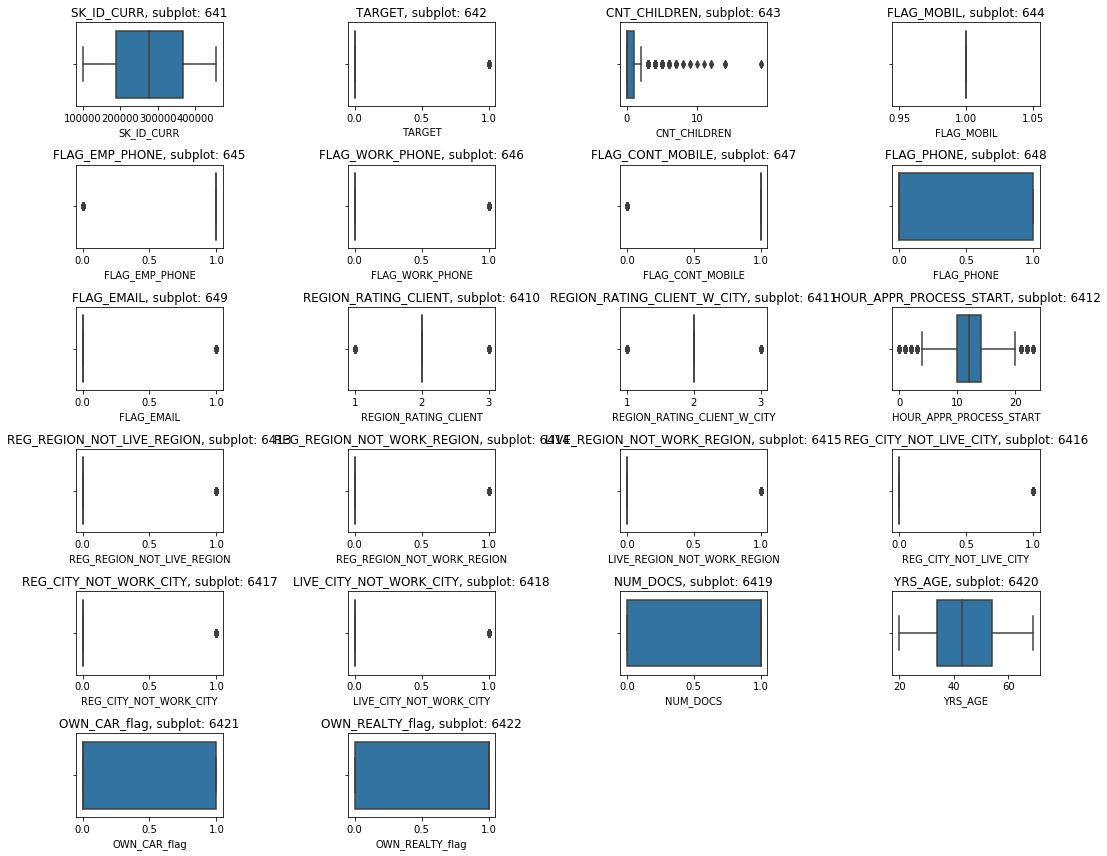

In [67]:
# Integer Data - Analysis by plotting Box plots
m = 6  # number of rows
n = 4  # number of columns
p = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in application_df.columns:
    if application_df[i].dtypes=="int64" or application_df[i].dtypes=="int32" :
        plt.subplot(m, n, p)
        plt.title('{}, subplot: {}{}{}'.format(i, m, n, p))
        plt.xlabel(i)
        sns.boxplot(application_df[i])
        p = p + 1

fig.tight_layout()
plt.show()

Many columns with int data type are Flag columns. For purpose of calculations we will keep them as int.
Eg:TARGET, REG_CITY_NOT_LIVE_CITY etc..
CNT_CHILDREN needs to further analysed as it has outliers

In [68]:
application_df['CNT_CHILDREN'].value_counts()

0     185323
1      53362
2      23583
3       3258
4        355
5         76
6         16
7          6
14         3
19         2
12         2
9          2
8          2
11         1
10         1
Name: CNT_CHILDREN, dtype: int64

13 records have CNT_CHILDREN >7. These could be a possibility. Leaving the column as is

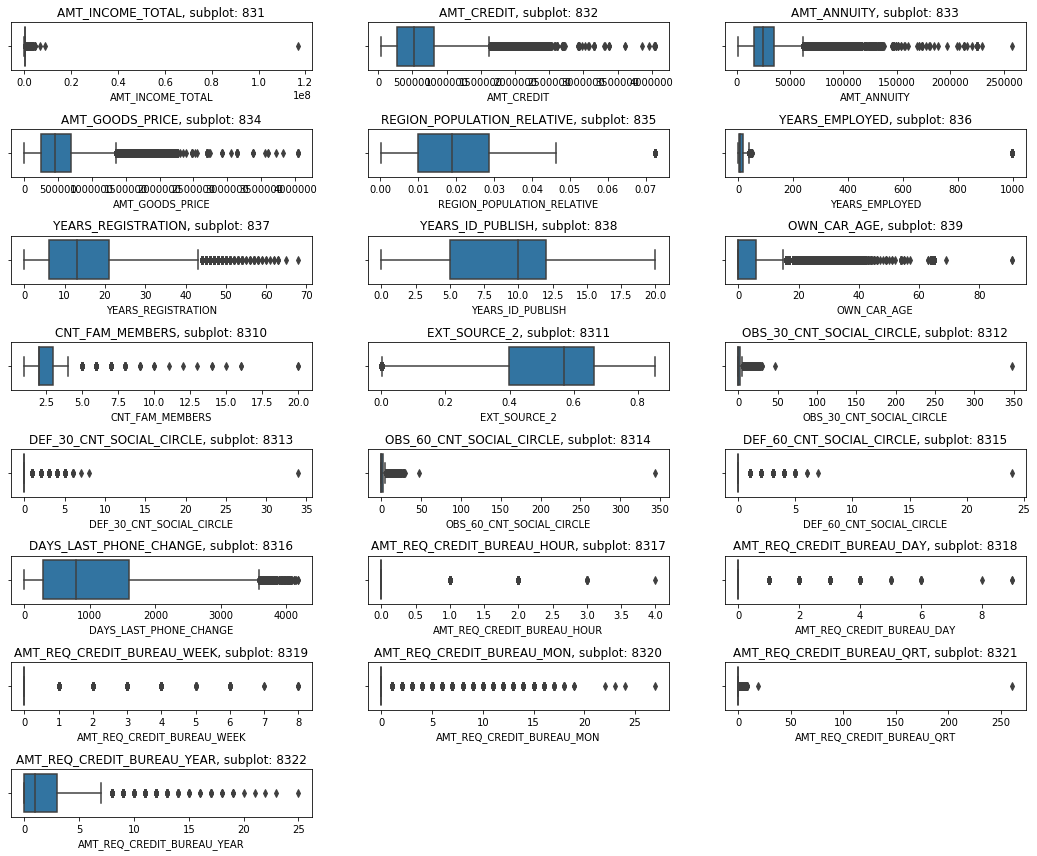

In [69]:
#  Float Data
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in application_df.columns:
    if application_df[i].dtypes=="float64" or application_df[i].dtypes=="float32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(application_df[i])
        c = c + 1

fig.tight_layout()
plt.show()

Outlier & Possible Treatment
Outliers observed in 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_EMPLOYED','YEARS_REGISTRATION','OWN_CAR_AGE', DAYS_LAST_PHONE_CHANGE

In [70]:
#checking value counts of columns with outliers
outlier_col=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_EMPLOYED','YEARS_REGISTRATION','OWN_CAR_AGE','DAYS_LAST_PHONE_CHANGE']

for i in outlier_col:
    print("\n")
 
    print(application_df[i].describe())
    print("\n")
 
    print(application_df[i].value_counts( dropna=False, normalize=True))
    print("\n")
 



count    2.659920e+05
mean     1.712756e+05
std      2.483851e+05
min      2.610000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


135000.0    0.115455
112500.0    0.098548
157500.0    0.087082
180000.0    0.081694
90000.0     0.070284
              ...   
50085.0     0.000004
200479.5    0.000004
400981.5    0.000004
401161.5    0.000004
131125.5    0.000004
Name: AMT_INCOME_TOTAL, Length: 2188, dtype: float64




count    2.659920e+05
mean     6.063205e+05
std      4.048083e+05
min      4.500000e+04
25%      2.719575e+05
50%      5.212800e+05
75%      8.131050e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


450000.0     0.032144
675000.0     0.029700
225000.0     0.026644
270000.0     0.024050
180000.0     0.022557
               ...   
1656000.0    0.000004
182956.5     0.000004
1198233.0    0.000004
734476.5     0.000004
1048806.0    0.000004
Name: AMT_CREDIT, Length: 5266, dtype: f

In [71]:
#using zscore to find out Outliers (>97%)

for i in outlier_col:
    print( i, ":", end= " ")
    print(application_df.iloc[np.where(np.abs(ss.zscore(application_df[i])>2))].shape)

AMT_INCOME_TOTAL : (1243, 58)
AMT_CREDIT : (11521, 58)
AMT_ANNUITY : (0, 58)
AMT_GOODS_PRICE : (14128, 58)
YEARS_EMPLOYED : (47711, 58)
YEARS_REGISTRATION : (9675, 58)
OWN_CAR_AGE : (9035, 58)
DAYS_LAST_PHONE_CHANGE : (9825, 58)


We can Substitite all above columns, except DAYS_LAST_PHONE_CHANGE with median values. However, not performing Outlier Treatment as instructed

In [72]:
#Creating list with names of categorical nominal , numerical and categorical oridnal variables. This is being done to make codes lesser repeatitive
obj_varList=[]
num_varList=[]
for i in application_df.columns:
    if application_df[i].dtypes=="object":
        obj_varList.append(i)
    else:
        num_varList.append(i)

cat_varList=[]
for i in num_varList:
    if len(application_df[i].unique())<4:
        application_df[i].astype("category")
        cat_varList.append(i)      

In [311]:
for i in cat_varList:
    num_varList.remove(i)

print("Numercial Columns :", num_varList) 
print("\n")

print("obj Columns :", obj_varList) 
print("\n")

print("cat Columns :", cat_varList)

Numercial Columns : ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'YRS_AGE', 'AGE_GROUP', 'INCOME_GROUP']


obj Columns : ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


cat Columns : ['TARGET', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE

In [73]:
# Removing income group and age group as these have binned data. Code_gender and Target are ordinal and hence move to differnt list
num_varList.remove('INCOME_GROUP')
num_varList.remove('AGE_GROUP')
num_varList.remove('SK_ID_CURR')
obj_varList.remove('CODE_GENDER')

cat_varList.append('CODE_GENDER')

cat_varList.remove('TARGET')

print("Numercial Columns :", num_varList) 
print("\n")

print("obj Columns :", obj_varList) 
print("\n")

print("cat Columns :", cat_varList) 

Numercial Columns : ['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NUM_DOCS', 'YRS_AGE', 'OWN_CAR_flag', 'OWN_REALTY_flag']


obj Columns : ['NAM

##  <font color=blue> Dataframe divided into TWO for  Target 1 and Target 0 
Target variable 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample <br>
Target variable 0 - all other cases, ie no payment difficulties

In [74]:
df_cat_0=application_df[application_df['TARGET']==0]
df_cat_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NUM_DOCS,YRS_AGE,OWN_CAR_flag,OWN_REALTY_flag,AGE_GROUP,INCOME_GROUP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,4.0,4.0,1.0,0.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1,45,0,0,"(35, 45]",VeryHigh
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1.0,12.0,7.0,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0,52,1,1,"(45, 55]",VeryLow
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,9.0,12.0,10.0,0.0,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0,54,0,1,"(45, 55]",Medium
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,5.0,14.0,2.0,0.0,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0,1,46,0,1,"(45, 55]",Low
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,9.0,4.0,2.0,17.0,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,1.0,0.0,1.0,0.0,1562.0,0.0,0.0,0.0,1.0,1.0,2.0,0,37,1,1,"(35, 45]",Medium


In [75]:
df_cat_1=application_df[application_df['TARGET']==1]
df_cat_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NUM_DOCS,YRS_AGE,OWN_CAR_flag,OWN_REALTY_flag,AGE_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,2.0,10.0,6.0,0.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1,25,0,1,"(15, 25]",High
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,8.0,18.0,6.0,0.0,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,10.0,1.0,10.0,0.0,161.0,0.0,0.0,0.0,0.0,2.0,2.0,1,51,0,1,"(45, 55]",Low
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,4.0,4.0,3.0,0.0,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.0,0.0,0.0,0.0,1075.0,0.0,0.0,0.0,2.0,0.0,4.0,1,47,0,1,"(45, 55]",High
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,10.0,1.0,13.0,0.0,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,1.0,0.0,1.0,0.0,1480.0,0.0,0.0,0.0,0.0,0.0,2.0,1,36,0,0,"(35, 45]",Medium
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,999.0,15.0,12.0,0.0,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,67,0,1,"(65, 75]",VeryLow


### Univariate Analysis on Categorical Nominal to analyse both data frames

Graph for :  NAME_CONTRACT_TYPE


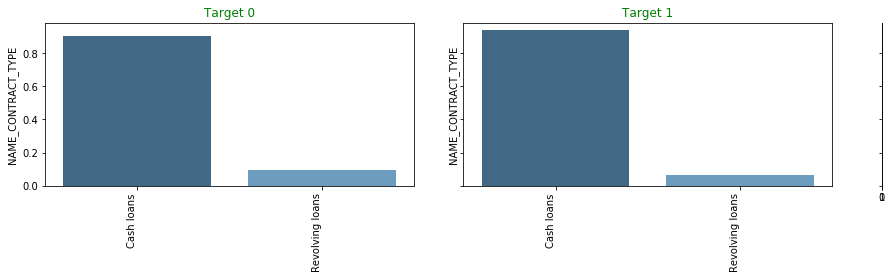

Graph for :  FLAG_OWN_CAR


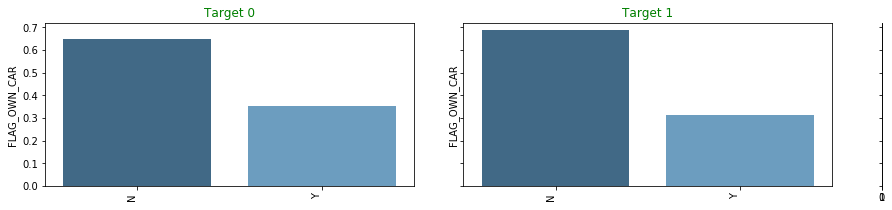

Graph for :  FLAG_OWN_REALTY


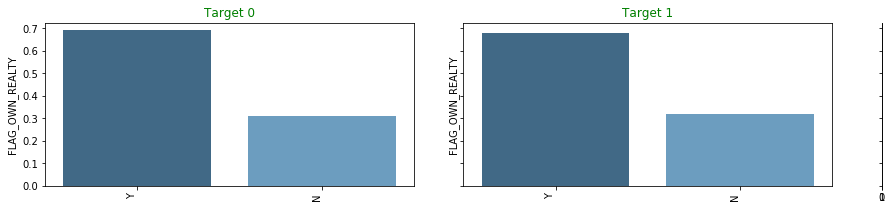

Graph for :  NAME_TYPE_SUITE


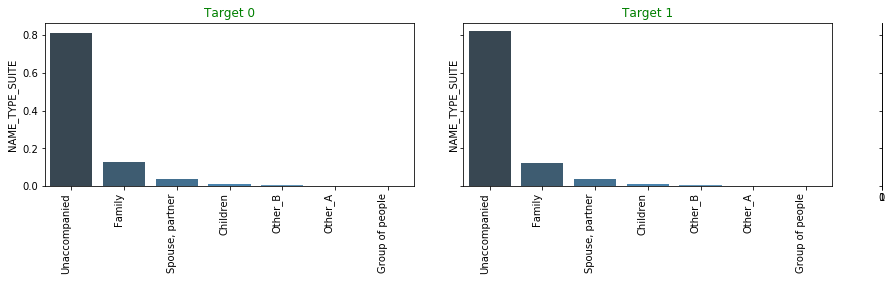

Graph for :  NAME_INCOME_TYPE


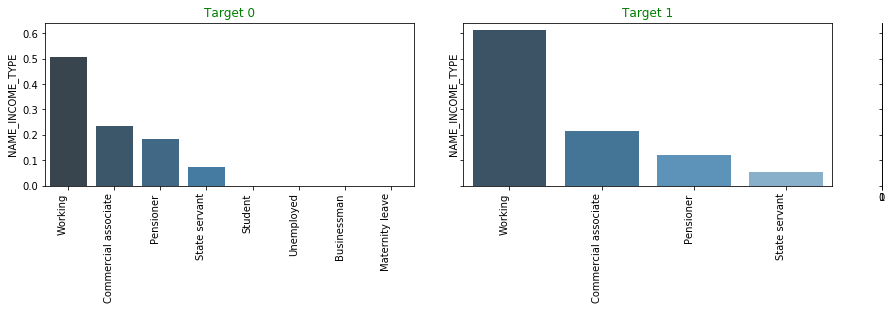

Graph for :  NAME_EDUCATION_TYPE


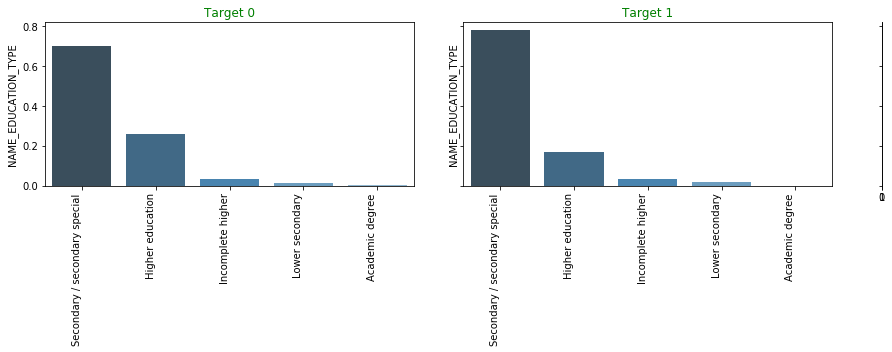

Graph for :  NAME_FAMILY_STATUS


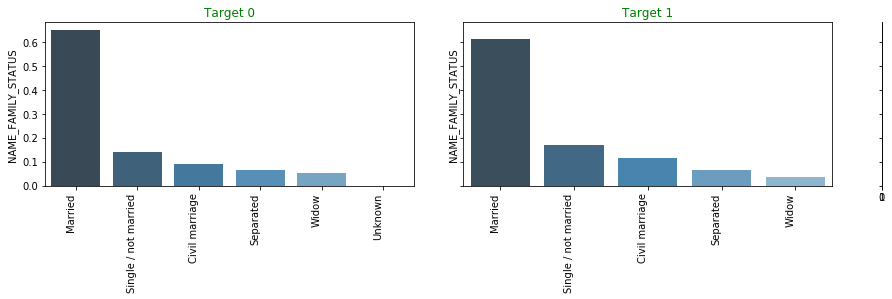

Graph for :  NAME_HOUSING_TYPE


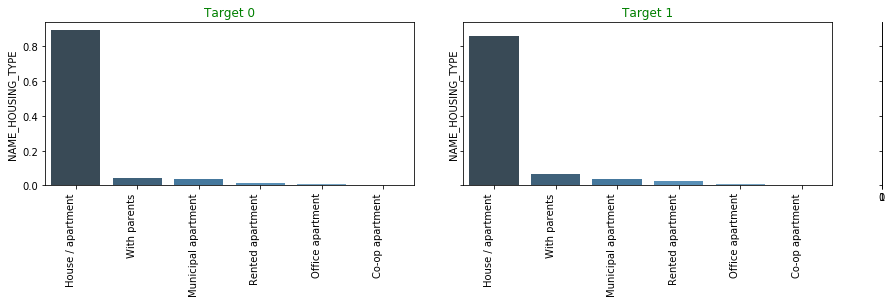

Graph for :  OCCUPATION_TYPE


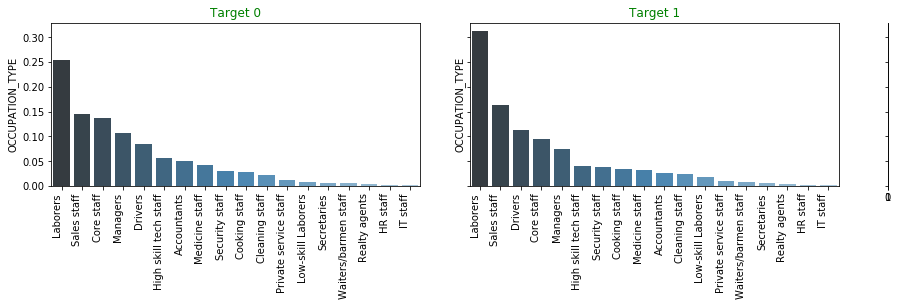

Graph for :  WEEKDAY_APPR_PROCESS_START


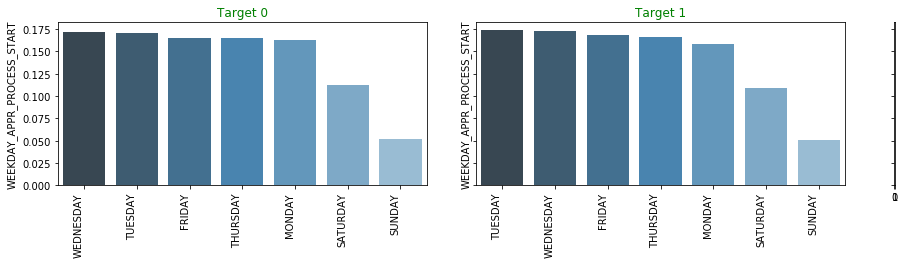

Graph for :  ORGANIZATION_TYPE


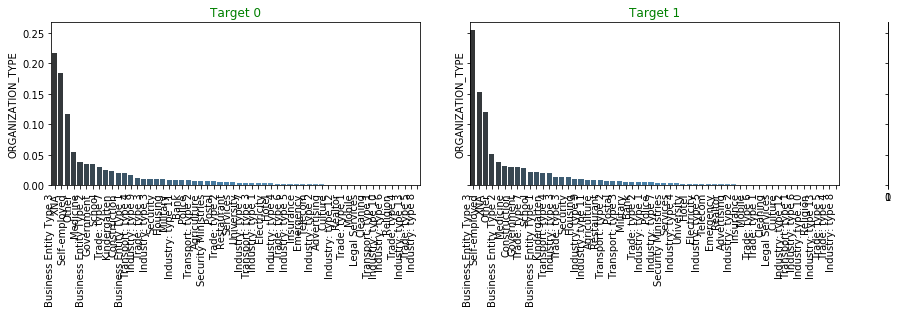

In [76]:
#Running loop and creating plots to analyse all Categorical Nominal variables

for i in obj_varList:
    
    cat_num_0=df_cat_0[i].value_counts(normalize=True)
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(15,3))
    print("Graph for : ",i)
    chart1=sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1, palette="Blues_d")
    chart1.set_xticklabels(chart1.get_xticklabels(minor=False), rotation=90, horizontalalignment='right')
    chart1.axes.set_title('Target 0',fontsize= 12,fontweight= 7,color='Green')
    cat_num_1=df_cat_1[i].value_counts(normalize=True)
    chart2=sns.barplot(x=cat_num_1.index, y=cat_num_1,ax=ax2, palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90, horizontalalignment='right')
    chart2.axes.set_title('Target 1',fontsize= 12,fontweight= 7,color='Green')
    plt.show()

Few notable points
    1. NAME_CONTRACT TYPE- Cash Loans are large part of the company's portfolio. For Target 0 - 85% and almost 95% for Target-1 
    2. NAME_TYPE_SUIT - 80-90% in Target 0 and Target 1 are applying for loan Unaccompanied. Indicating, this is not a parameter that can influence payment default. 
    3. NAME_INCOME_TYPE - 50% working in case of Target 0 and 60% in case of Target 1 are working income types. 
    4. NAME_EDUCATION_TYPE - In both Target 0 and 1, applicants with Secondary Education has applied for loans more than others.90% of defaulting payments are from applicants with secondary income. Needs further analysis 
    5. NAME_FAMILY_STATUS - Married applicants - almost 60% have defaulted on payments 
    6. NAME_HOSUING_TYPE -85-90% in Target 0 and Target 1 applicants are staying in "House/apartment". Indicating, this is not a parameter that can influence payment default. 
    7. OCCUPATION_TYPE - Labourers, sales staff, core staff, drivers constitute of 50% of defaulters. Labourers is the highest percentage of applicants too. 
    8. ORGANIZATION_TYPE - Business ENTITY TYPE 3 AND SELF EMPLOYED add upto 40% defaulters. The highest % of loan takers are also this category. 

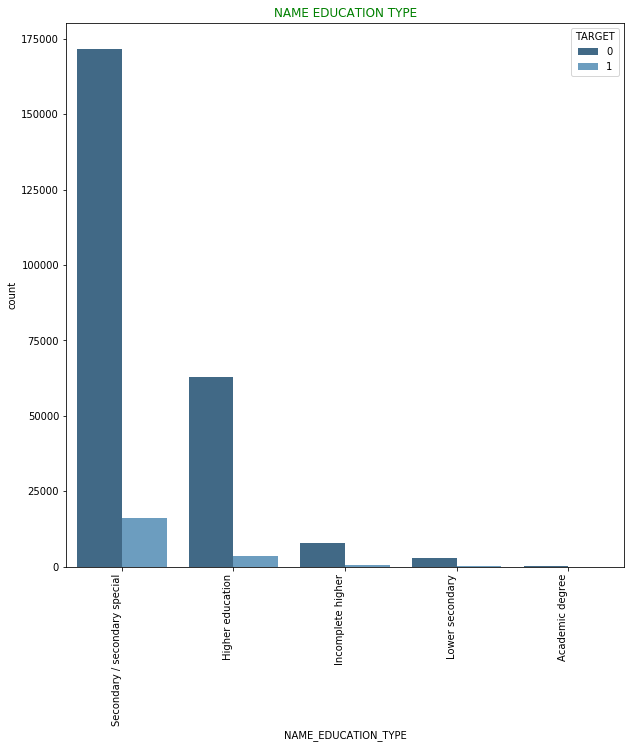

In [77]:
plt.figure(figsize=(10,10))

chart=sns.countplot(x='NAME_EDUCATION_TYPE', data=application_df, hue="TARGET", palette="Blues_d")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
chart.axes.set_title('NAME EDUCATION TYPE',fontsize= 12,fontweight= 7,color='Green')
plt.show()

as the data is not balanced,the above plot cannot be inferred correctly

### Univariate Analysis on Categorical Ordered

Graph for :  FLAG_MOBIL


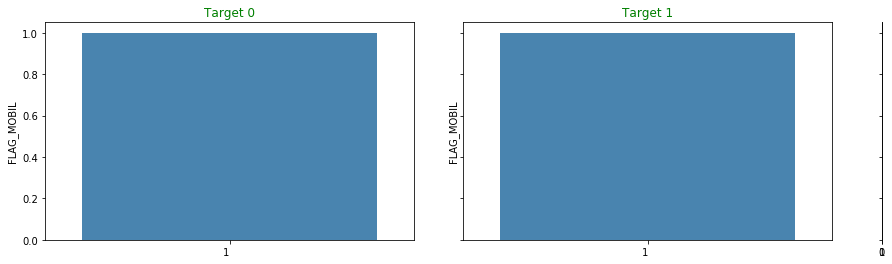

Graph for :  FLAG_EMP_PHONE


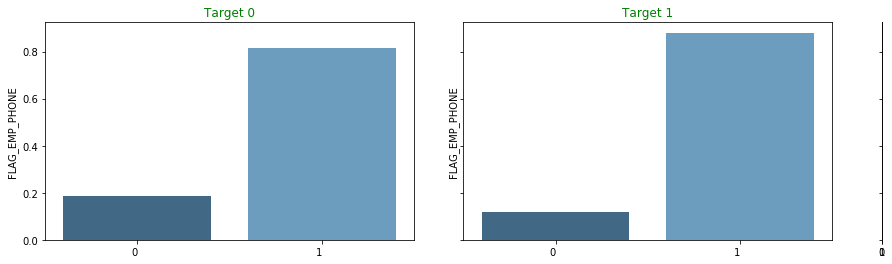

Graph for :  FLAG_WORK_PHONE


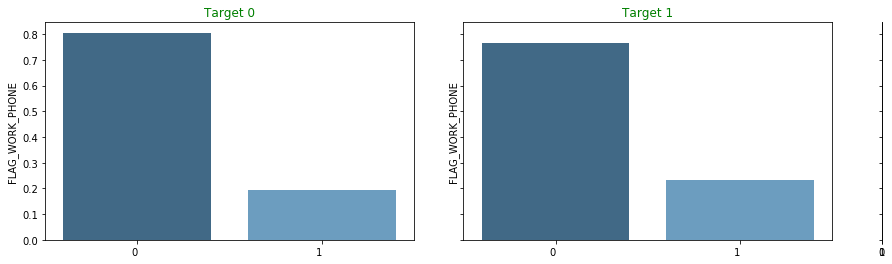

Graph for :  FLAG_CONT_MOBILE


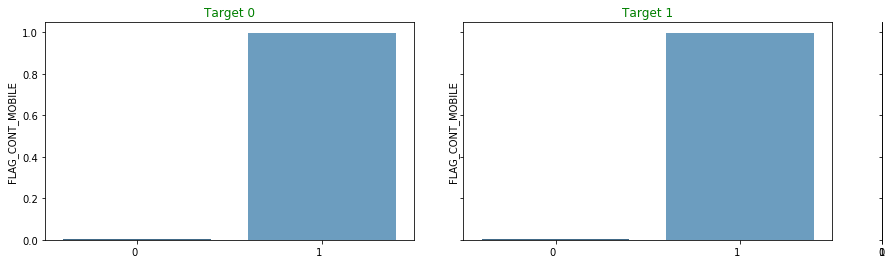

Graph for :  FLAG_PHONE


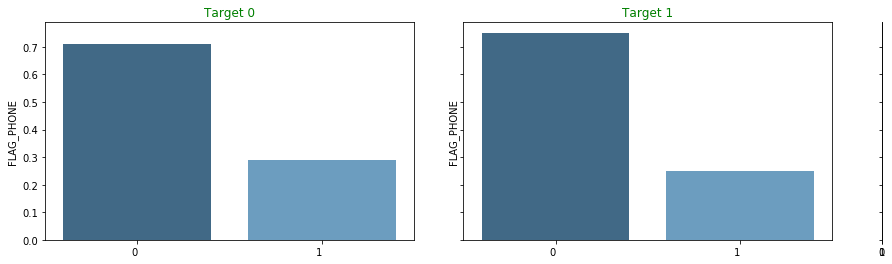

Graph for :  FLAG_EMAIL


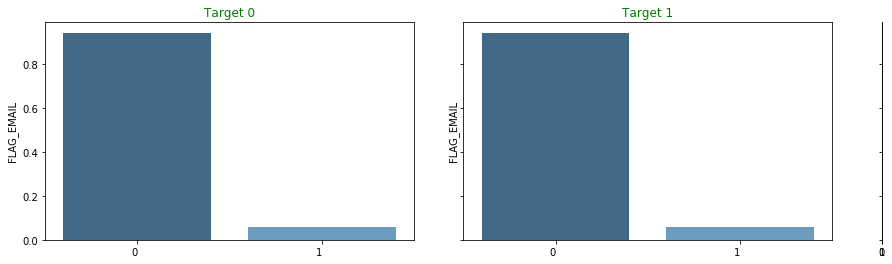

Graph for :  REGION_RATING_CLIENT


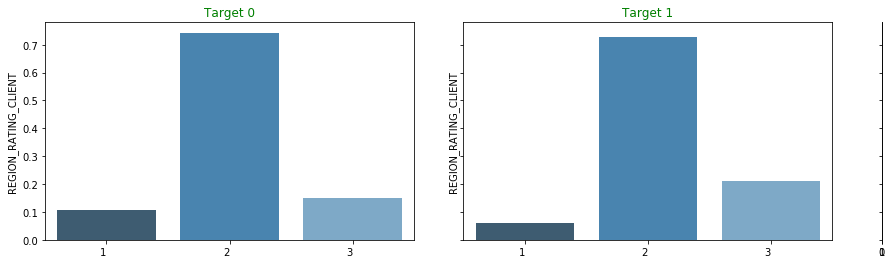

Graph for :  REGION_RATING_CLIENT_W_CITY


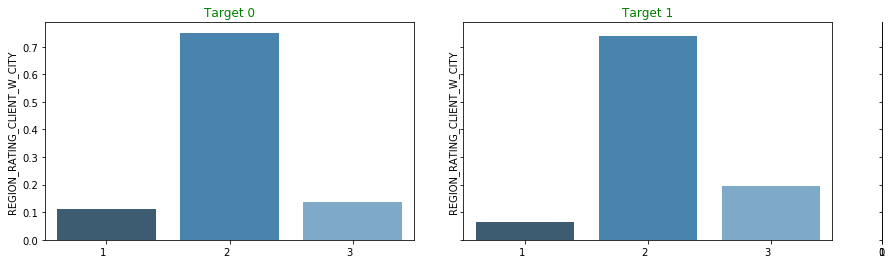

Graph for :  REG_REGION_NOT_LIVE_REGION


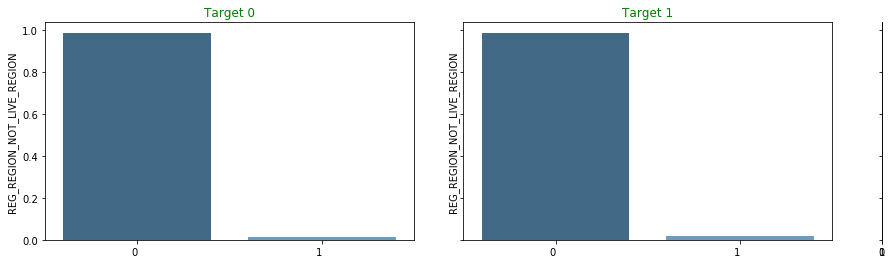

Graph for :  REG_REGION_NOT_WORK_REGION


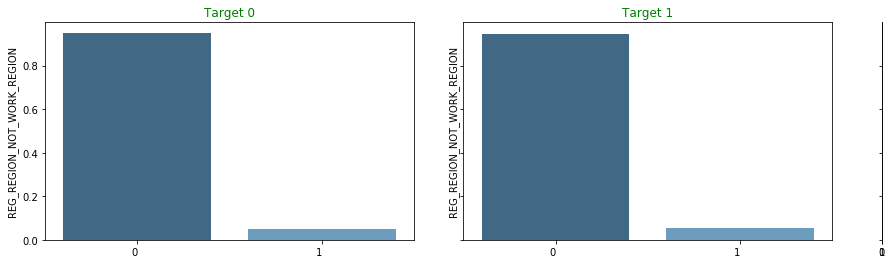

Graph for :  LIVE_REGION_NOT_WORK_REGION


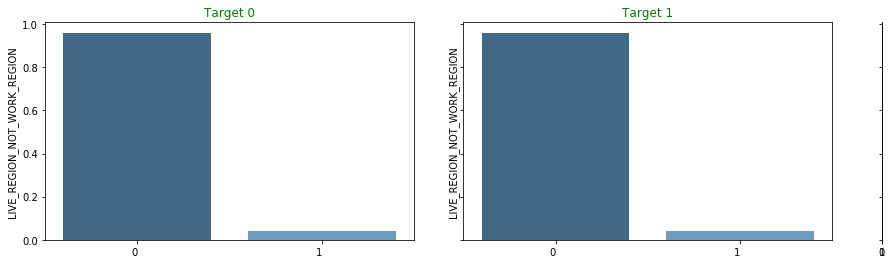

Graph for :  REG_CITY_NOT_LIVE_CITY


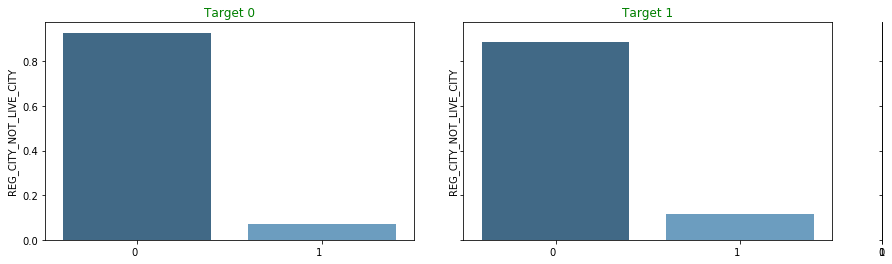

Graph for :  REG_CITY_NOT_WORK_CITY


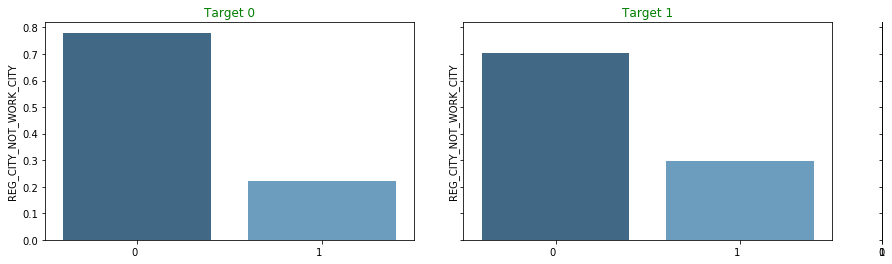

Graph for :  LIVE_CITY_NOT_WORK_CITY


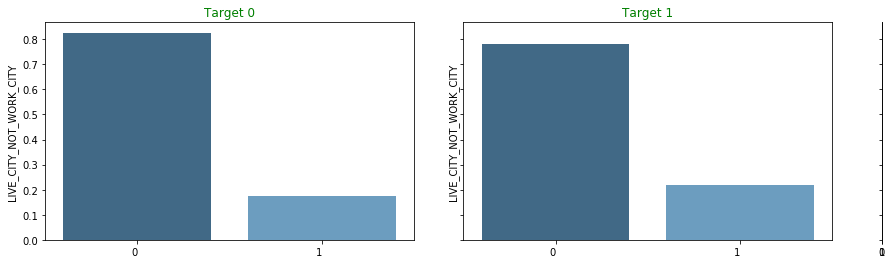

Graph for :  NUM_DOCS


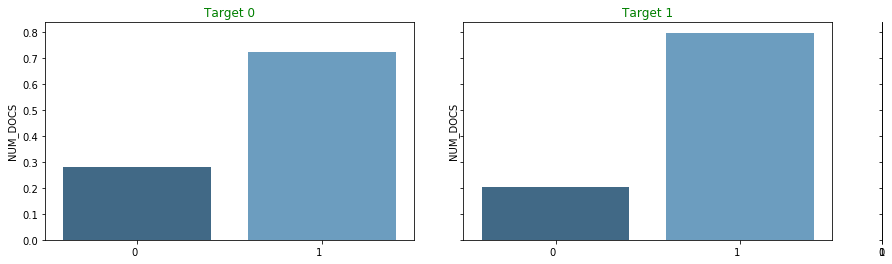

Graph for :  OWN_CAR_flag


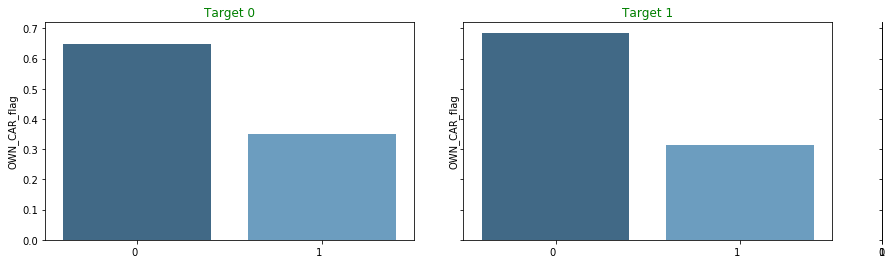

Graph for :  OWN_REALTY_flag


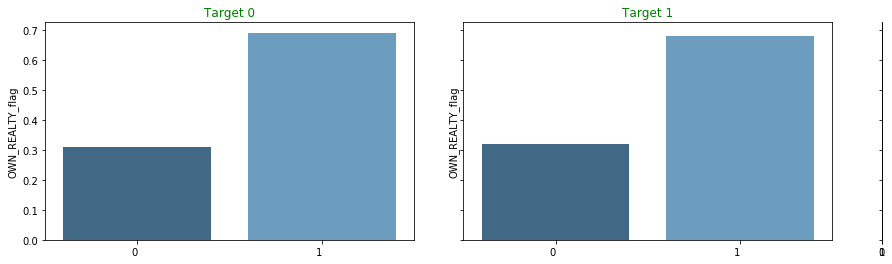

Graph for :  CODE_GENDER


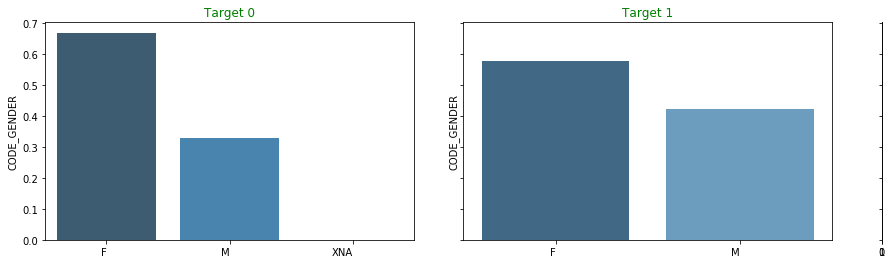

In [78]:
for i in cat_varList:
    cat_num_0=df_cat_0[i].value_counts(normalize=True)
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(15,4))
    print("Graph for : ",i)
    chart1=sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1,palette="Blues_d")
    chart1.set_xticklabels(chart1.get_xticklabels(), horizontalalignment='right')
    chart1.axes.set_title('Target 0',fontsize= 12,fontweight= 7,color='Green')
    cat_num_1=df_cat_1[i].value_counts(normalize=True)
    chart2=sns.barplot(x=cat_num_1.index, y=cat_num_1,ax=ax2,palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(), horizontalalignment='right')
    chart2.axes.set_title('Target 1',fontsize= 12,fontweight= 7,color='Green')
    plt.show()

##### **Few notable points**
    1.REGION_RATING_CLIENT'& 'REGION_RATING_CLIENT_W_CITY'- Region 2 has the highest % applicants both in TARGET 0 and Target 1
    2.REG_REGION_NOT_LIVE_REGION, REGION_NOT_WORK_REGION, VE_REGION_NOT_WORK_REGION'- For both Target 0 and Target 1 out of Region, ie 1 is very low and does not seem to affect the default rate
    3. REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY - Default ratio is higher for 1, ie different from permanent address  
    4.'CODE_GENDER' - Ratio of F to M in Target 0 is 2.3 and F to M in Target 0 - 1.3. indicatign that MEN are defaulting more than Women

### Univariate Analysis on Continuous Variables

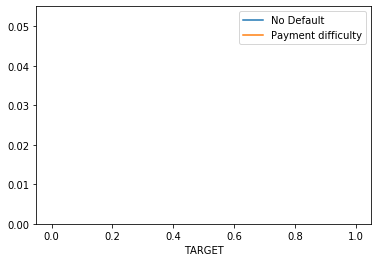

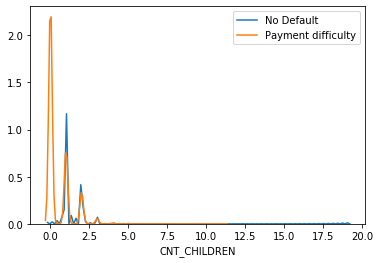

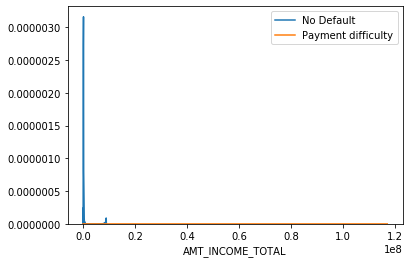

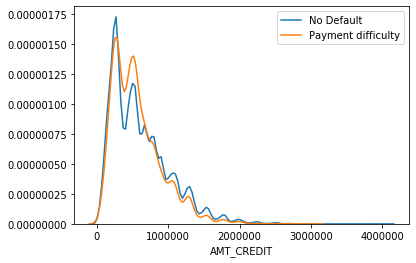

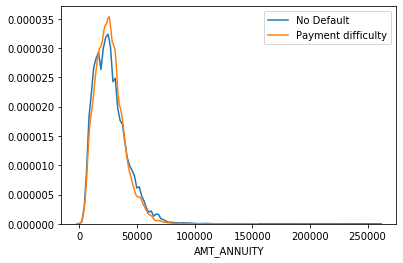

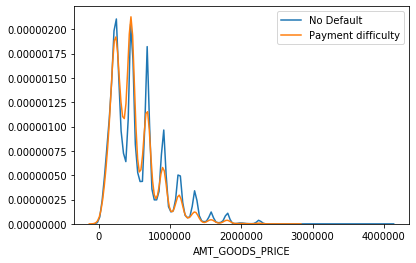

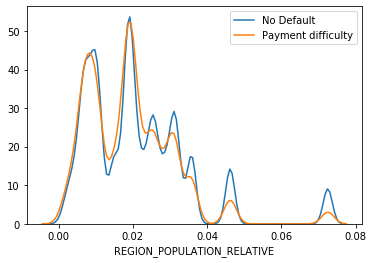

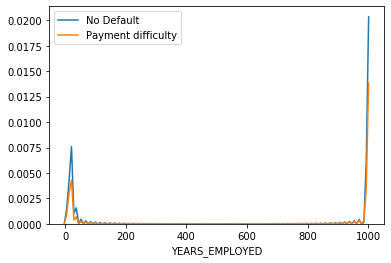

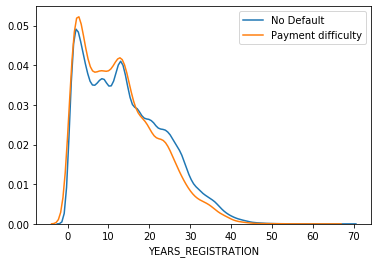

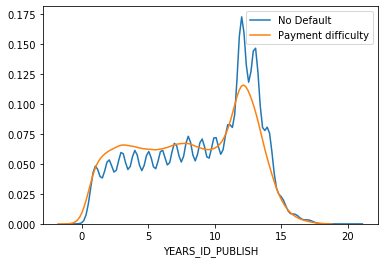

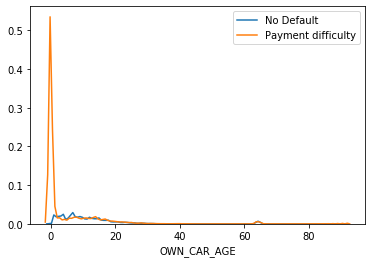

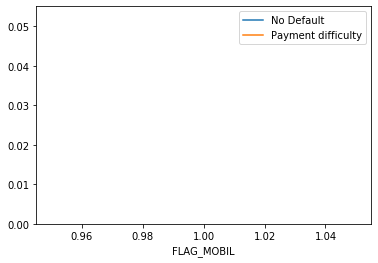

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

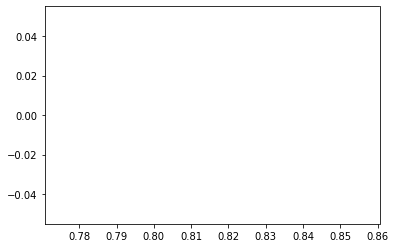

In [79]:
for i in num_varList:
    sns.distplot(df_cat_0[i], hist = False, label = 'No Default')
    sns.distplot(df_cat_1[i], hist = False, label = 'Payment difficulty')
    plt.show()

##### **Few notable points**
     1.AMT_CREDIT - Appears lower for Target 1, which is a good sign as lesser default loss to the company.
    2. AGE_IN_YEARS Density of 30 years in Target 1 larger, indicating younger are defaulting more
    3. YEARS_EMPLOYED has large no of rows of incorrect data and hence the data representation is incorrect
    4. Lesser no of Target 1 OWN cars
    5. EXT_SOURCE_2 is clearing showing that TARGET 0 has higher densiy of higher scores
    6. OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE - Very clearly visible that for Target 1, 30 DPD and 60 DPD observed in social surroundign is higher.
    7. DAYS_LAST_PHONE_CHANGE- More people from the Target 1 have changed their phone earlier than Target 1. Indicating intention issues in repaying loan
    8. AMT_REQ_CREDIT_BUREAU_YEAR, month, week, hour - has lesser Target 1 at 0 hits. This could indicate they are looking getting loans from various financial companies
    

### Bivariate Analysis on Categorical and Continuous Variable

#### Categorical and Continuous Variable

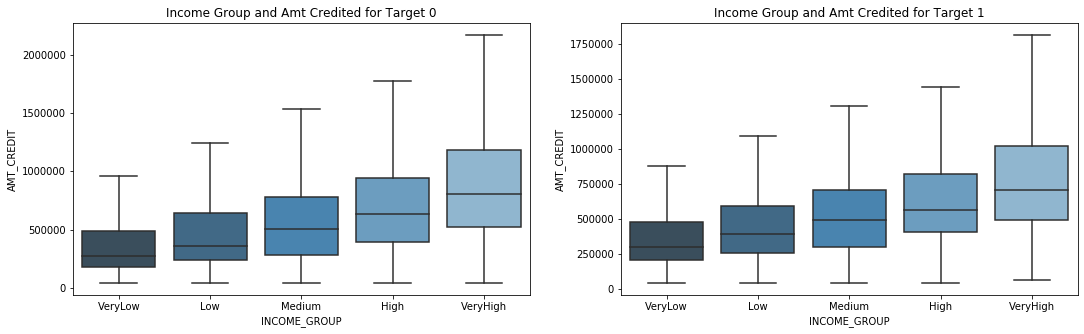

In [80]:
# Checking INCOME_GROUP vs AMT_CREDIT for both data frames

plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
plt.title("Income Group and Amt Credited for Target 0")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data =df_cat_0, showfliers=False, palette="Blues_d")

plt.subplot(1,2,2)
plt.title("Income Group and Amt Credited for Target 1")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data = df_cat_1, showfliers=False, palette="Blues_d")
plt.show()

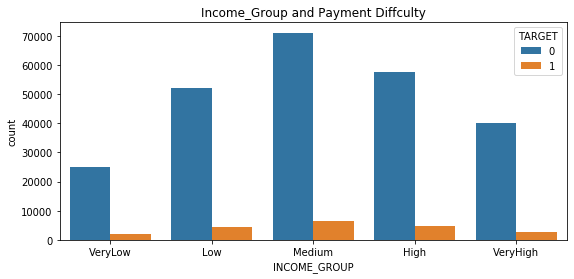

In [81]:
#Checking the same columns to see the affect of Very High Income group
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Income_Group and Payment Diffculty")
sns.countplot('INCOME_GROUP', hue = 'TARGET', data =application_df)
plt.show()

In [83]:
#Checking absolute values
result=pd.pivot_table(data=application_df, index='INCOME_GROUP',columns='TARGET',values='AMT_CREDIT', aggfunc="mean")
round(result,2)

TARGET,0,1
INCOME_GROUP,,
VeryLow,351750.53,370108.92
Low,459826.05,454261.40
Medium,576062.56,549404.83
High,703181.56,647939.46
VeryHigh,890294.24,790405.74


##### **Few notable points**
    1. We can infer that though the maximum no of loans is given to Medium income group. Default value per loan is highest in High income group as the AMT_CREDIT is higher too. The loan book of the financial institution can get affected due to higher amount not being paid back.
    2. The company must devise a different set of rules and policies while approving higher income group loans.

#### Categorical and Continuous Variable

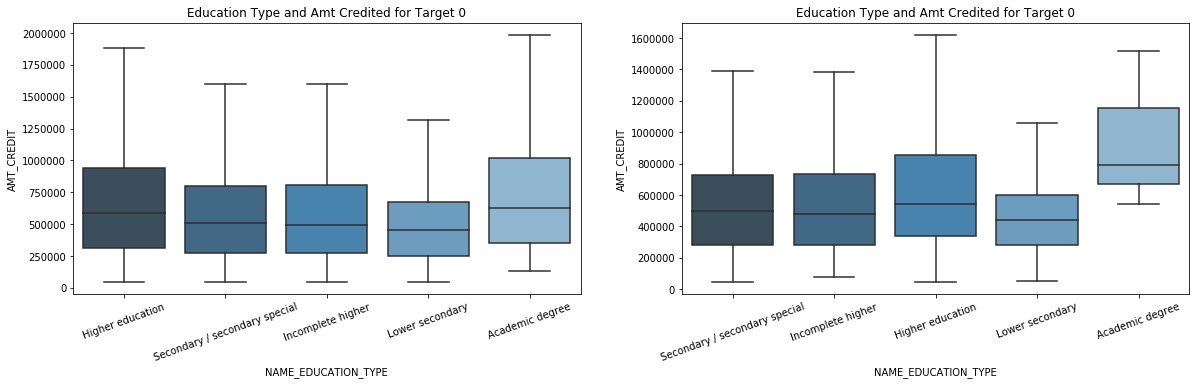

In [84]:
## Bivariate Categoric to Continuous 

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Education Type and Amt Credited for Target 0")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data =df_cat_0,showfliers=False, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("Education Type and Amt Credited for Target 0")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = df_cat_1,showfliers=False, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.show()

Few notable points
1. Median of Loan values defaulting for Applicants with Academic degree is higher. But as we saw in a plot above, no of applicants with academic degree is miniscule 
2. No inference can be drwan from this analysis.

In [85]:
#Analysing relationship of AMT_CREDIT with Gender and Income type for Target 0


res=pd.pivot_table(data=df_cat_0, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(res,0)

CODE_GENDER,F,M,XNA
NAME_INCOME_TYPE,,,
Businessman,1237500.0,607500.0,NaN
Commercial associate,676875.0,695314.0,540000.0
Maternity leave,315000.0,NaN,NaN
Pensioner,535373.0,581315.0,NaN
State servant,668363.0,704802.0,NaN
Student,382306.0,568756.0,NaN
Unemployed,435000.0,877500.0,NaN
Working,585302.0,596720.0,352500.0


In [86]:
#Analysing relationship of AMT_CREDIT with Gender and Income type for Target 1


res1=pd.pivot_table(data=df_cat_1, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(res1,0)

CODE_GENDER,F,M
NAME_INCOME_TYPE,,
Commercial associate,627055.0,610744.0
Pensioner,551221.0,567473.0
State servant,617084.0,617798.0
Working,544350.0,544527.0


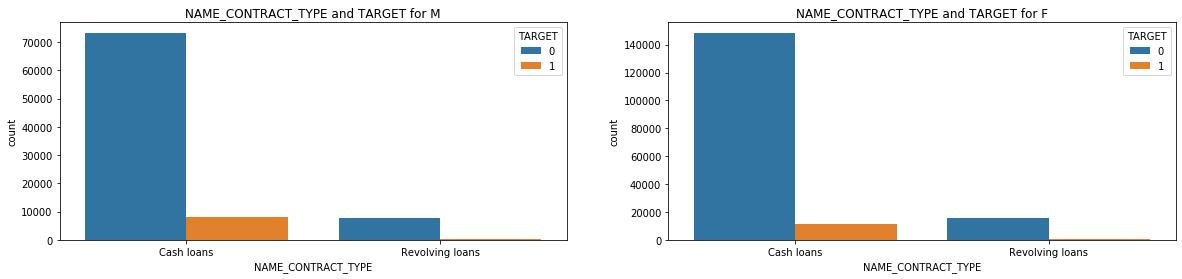

In [87]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE and TARGET for M")

sns.countplot('NAME_CONTRACT_TYPE', hue = "TARGET", data=application_df[(application_df['CODE_GENDER']=="M")])

plt.subplot(1,2,2)
plt.title("NAME_CONTRACT_TYPE and TARGET for F")
sns.countplot('NAME_CONTRACT_TYPE', hue = "TARGET", data=application_df[(application_df['CODE_GENDER']=="F")])

plt.show()

##### **Few notable points**
    1. Male applicants are defaulting more that female applicants

## <font color = blue> Top Correlations

In [88]:
#correlation for Target 0
df_corr_0=df_cat_0.drop(cat_varList, axis=1)
correlation_cat_0=df_corr_0.corr().abs()

In [89]:
corr_df = correlation_cat_0.where(np.triu(np.ones(correlation_cat_0.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df = corr_df.sort_values(by=['Correlation'], ascending=False)

corr_df.head(10)

,Column1,Column2,Correlation
474,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998528
166,AMT_GOODS_PRICE,AMT_CREDIT,0.986852
326,CNT_FAM_MEMBERS,CNT_CHILDREN,0.880158
502,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.858447
167,AMT_GOODS_PRICE,AMT_ANNUITY,0.777909
139,AMT_ANNUITY,AMT_CREDIT,0.773174
710,YRS_AGE,YEARS_EMPLOYED,0.626117
138,AMT_ANNUITY,AMT_INCOME_TOTAL,0.446181
165,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.371678
111,AMT_CREDIT,AMT_INCOME_TOTAL,0.365239


In [90]:
#correlation for Target 1
df_corr_1=df_cat_1.drop(cat_varList, axis=1)
correlation_cat_1=df_corr_1.corr().abs()
corr_df1 = correlation_cat_1.where(np.triu(np.ones(correlation_cat_1.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df1.columns=['Column1','Column2','Correlation']
corr_df1.dropna(subset = ['Correlation'], inplace = True)
corr_df1 = corr_df.sort_values(by=['Correlation'], ascending=False)

corr_df1.head(10)

,Column1,Column2,Correlation
474,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998528
166,AMT_GOODS_PRICE,AMT_CREDIT,0.986852
326,CNT_FAM_MEMBERS,CNT_CHILDREN,0.880158
502,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.858447
167,AMT_GOODS_PRICE,AMT_ANNUITY,0.777909
139,AMT_ANNUITY,AMT_CREDIT,0.773174
710,YRS_AGE,YEARS_EMPLOYED,0.626117
138,AMT_ANNUITY,AMT_INCOME_TOTAL,0.446181
165,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.371678
111,AMT_CREDIT,AMT_INCOME_TOTAL,0.365239


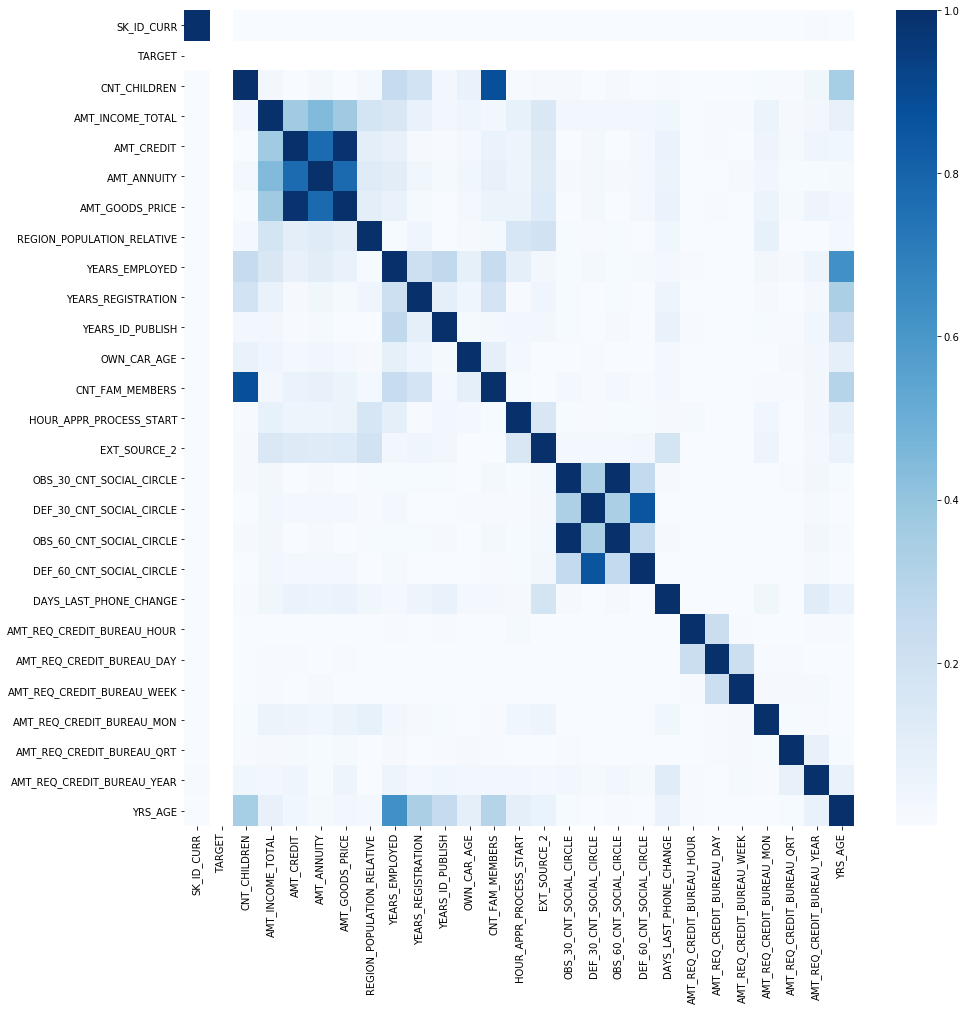

In [339]:
#Checking above analysis via heatmap

#df_num_0=df_cat_0[['TARGET']==0][numvarList]
plt.figure(figsize=(15,15))
sns.heatmap(correlation_cat_0, cmap='Blues')
plt.show()

<Figure size 864x720 with 0 Axes>

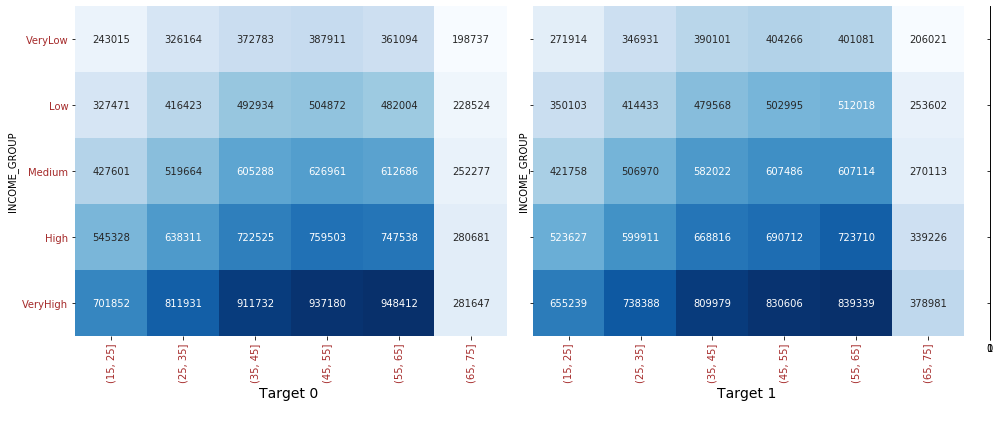

In [91]:
#Analysing relationship of AMT_CREDIT with AGE GROUP and income group
plt.figure(figsize=[12,10])
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(14,6))

res=pd.pivot_table(data=df_cat_0, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")

c=sns.heatmap(res, annot=True,cmap='Blues', fmt="g", ax=ax1, cbar=False)
c.set_xlabel('Target 0 \n', fontsize=14,fontweight= 7)
c.set_xticklabels(c.get_xticklabels(), rotation = 90, fontsize = 10, color="Brown")

res1=pd.pivot_table(data=df_cat_1, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")

c1=sns.heatmap(res1, annot=True,cmap='Blues', fmt="g", ax=ax2, cbar=False)

c1.set_xlabel('Target 1 \n', fontsize=14,fontweight= 7,)
c1.set_xticklabels(c1.get_xticklabels(), rotation = 90, fontsize = 10, color="Brown")

c.set_yticklabels(c.get_yticklabels(), rotation = 0, fontsize = 10, color="Brown")

plt.tight_layout()
plt.show()

Age Group 55-65 in Very High income group has high amount credit. As explained above, this could result as loss in loan book

# Previous Application

## <font color =blue> Data Loading and Inspection

In [94]:
# Reading the csv file 'previous_application.csv' using 'read_csv'
Previous_df = pd.read_csv('previous_application.csv')

Previous_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
Previous_df.shape

(1670214, 37)

In [96]:
Previous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

##  <font color =blue> Data Cleaning
### Missing Values

In [97]:
# Checking missing values
Previous_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [100]:
# Checking % of missing values

round(Previous_df.isnull().sum()/len(Previous_df)*100,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [101]:
### Handling Missing Values 

In [102]:
#As the file having huge records, deleting rows withy Null values for AMT_ANNUITY, AMT_GOODS_PRICE. We need these columns for 
#analysis as seen in application data frame and hence not deleting the columns

Previous_df = Previous_df.dropna(axis=0, subset=['AMT_ANNUITY'])
Previous_df = Previous_df.dropna(axis=0, subset=['AMT_GOODS_PRICE'])
round(Previous_df.isnull().sum()/len(Previous_df)*100,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                     0.00
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               40.55
AMT_GOODS_PRICE                 0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              40.55
RATE_INTEREST_PRIMARY          99.52
RATE_INTEREST_PRIVILEGED       99.52
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                32.65
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [103]:
#Checking columns with >20% NULL values

print(Previous_df.columns[(Previous_df.isnull().sum() * 100 / Previous_df.shape[0]) > 20])

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [104]:
#Dropping all >20 null value columns
dropcol=Previous_df.columns[(Previous_df.isnull().sum() * 100 / Previous_df.shape[0]) > 20]
Previous_df.drop(axis=1, columns=dropcol, inplace=True)
Previous_df.shape

(1246320, 26)

In [105]:
#Checking columns with NULL values

Previous_df.columns[(Previous_df.isnull().sum()>0)]

Index([], dtype='object')

In [106]:
Previous_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06
mean,1.913834e+06,2.783561e+05,1.605938e+04,2.325942e+05,2.492727e+05,2.326240e+05,1.258250e+01,9.978914e-01,-1.021855e+03,4.056201e+02,1.671954e+01
std,5.340824e+05,1.027801e+05,1.492967e+04,3.186545e+05,3.465843e+05,3.186729e+05,3.326113e+00,4.587116e-02,7.864511e+02,8.246103e+03,1.448712e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.446936e+06,1.893740e+05,6.327990e+03,5.220000e+04,5.157450e+04,5.220000e+04,1.000000e+01,1.000000e+00,-1.534000e+03,-1.000000e+00,6.000000e+00
50%,1.910148e+06,2.787420e+05,1.125000e+04,1.125000e+05,1.161675e+05,1.125000e+05,1.200000e+01,1.000000e+00,-7.660000e+02,2.700000e+01,1.200000e+01
75%,2.377944e+06,3.673812e+05,2.061227e+04,2.475000e+05,2.700000e+05,2.475000e+05,1.500000e+01,1.000000e+00,-3.850000e+02,1.460000e+02,2.400000e+01
max,2.845379e+06,4.562550e+05,4.180581e+05,5.850000e+06,4.509688e+06,5.850000e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


In [107]:
#deleting some additional numerical var columns as we do not intend to use them for analysis and they dont seem relevant too

dropcol=['HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA']
Previous_df.drop(axis=1, columns=dropcol, inplace=True)
Previous_df.shape

(1246320, 22)

In [108]:
# Analysing values of object variable
for i in Previous_df.columns:
    if Previous_df[i].dtypes=="object":
        print(Previous_df[i].value_counts(normalize=True, dropna= False))
        print('\n\n')

Consumer loans     0.554779
Cash loans         0.370341
Revolving loans    0.074880
Name: NAME_CONTRACT_TYPE, dtype: float64



SATURDAY     0.152194
FRIDAY       0.149213
WEDNESDAY    0.148734
TUESDAY      0.148228
MONDAY       0.146892
THURSDAY     0.146119
SUNDAY       0.108620
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64



Y    0.997222
N    0.002778
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64



XAP                                 0.629659
XNA                                 0.314679
Repairs                             0.019014
Other                               0.012436
Urgent needs                        0.006744
Buying a used car                   0.002304
Building a house or an annex        0.002161
Everyday expenses                   0.001921
Medicine                            0.001739
Payments on other loans             0.001545
Education                           0.001257
Journey                             0.000991
Purchase of electronic equipment    0.000846


### Deleting columns not needed for analysis 
    WEEKDAY_APPR_PROCESS_START -Not relevant
    NAME_PRODUCT_TYPE -55% XNA values
    NAME_CASH_LOAN_PURPOSE - 90% NNA / XAP values, 
    NAME_GOODS_CATEGORY - hIGH XNA values
    NAME_PAYMENT_TYPE - 19% XAP values
    CODE_REJECT_REASON - 80% XAP values

In [109]:
# Deleting columns mentioned above
dropcol=['WEEKDAY_APPR_PROCESS_START', 'NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY','NAME_PAYMENT_TYPE','CODE_REJECT_REASON']
Previous_df.drop(axis=1, columns=dropcol, inplace=True)
Previous_df.shape

(1246320, 16)

## <font color=blue> Univariate Analysis
### Categorical Nominal

Consumer loans     0.554779
Cash loans         0.370341
Revolving loans    0.074880
Name: NAME_CONTRACT_TYPE, dtype: float64


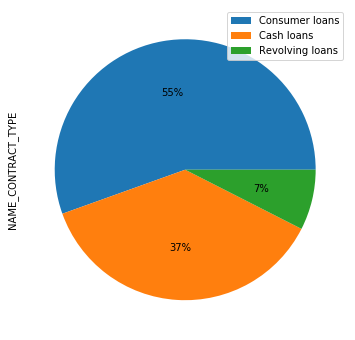



Y    0.997222
N    0.002778
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64


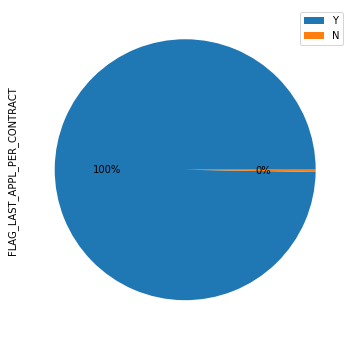



Approved        0.797498
Refused         0.193344
Canceled        0.008427
Unused offer    0.000730
Name: NAME_CONTRACT_STATUS, dtype: float64


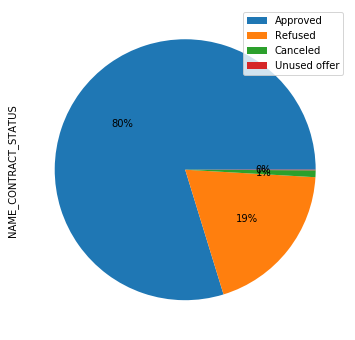



Repeater     0.677066
New          0.236334
Refreshed    0.085877
XNA          0.000723
Name: NAME_CLIENT_TYPE, dtype: float64


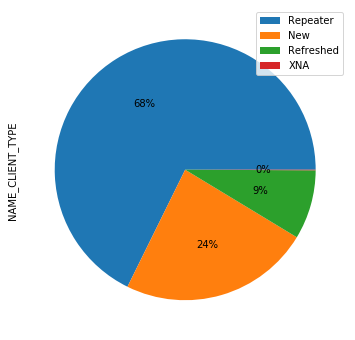



POS      0.554438
Cash     0.370341
Cards    0.074880
Cars     0.000341
Name: NAME_PORTFOLIO, dtype: float64


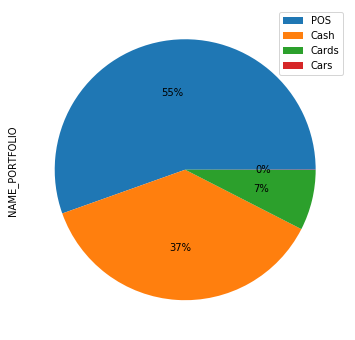



Country-wide                  0.359302
Credit and cash offices       0.317926
Stone                         0.166645
Regional / Local              0.085031
AP+ (Cash loan)               0.038082
Contact center                0.027836
Channel of corporate sales    0.004817
Car dealer                    0.000363
Name: CHANNEL_TYPE, dtype: float64


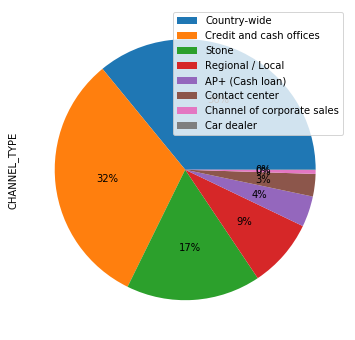



XNA                     0.389958
Consumer electronics    0.308245
Connectivity            0.190554
Furniture               0.045780
Construction            0.023736
Clothing                0.019091
Industry                0.015262
Auto technology         0.003989
Jewelry                 0.002173
MLM partners            0.000800
Tourism                 0.000412
Name: NAME_SELLER_INDUSTRY, dtype: float64


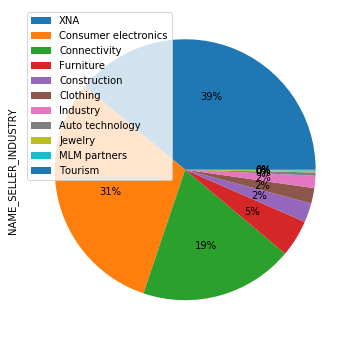



middle        0.309335
high          0.283497
low_normal    0.258437
XNA           0.074880
low_action    0.073850
Name: NAME_YIELD_GROUP, dtype: float64


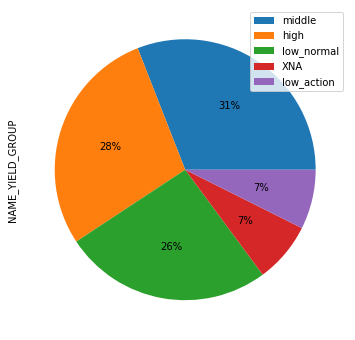



POS household with interest       0.206895
POS mobile with interest          0.152865
Cash X-Sell: middle               0.115446
Cash X-Sell: low                  0.104506
POS industry with interest        0.078757
POS household without interest    0.066522
Cash Street: high                 0.047852
Cash X-Sell: high                 0.047581
Card Street                       0.041335
Card X-Sell                       0.033545
Cash Street: middle               0.027808
Cash Street: low                  0.027147
POS mobile without interest       0.019322
POS other with interest           0.018255
POS industry without interest     0.010111
POS others without interest       0.002050
Name: PRODUCT_COMBINATION, dtype: float64


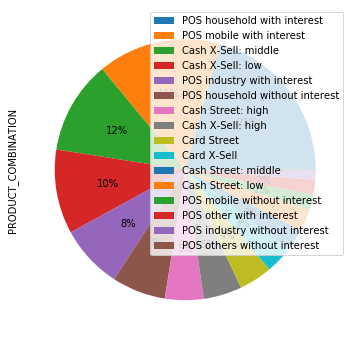

In [110]:
#Checking all object types Variables and their values
for i in Previous_df.columns:
    if Previous_df[i].dtypes=="object":
        print(Previous_df[i].value_counts(normalize=True, dropna= False))
        plt.figure(figsize=[6,6])
        Previous_df[i].value_counts(normalize=True, dropna=False).plot.pie(autopct='%1.f%%',labeldistance=None)
        plt.legend()
        plt.show()
        print("\n")

##### **Few notable points**
    1. This dataframe has a differnt type of loan called Consumer Loan, which was not there in Application data frame. 55% of loans are consumer loans. 37% cash loans and rest revolving
    2. Approved loans are 79% and refused, cancelled, unused - rest. **IMBALANCE IN DATA**
    3. 67% are repeaters. NAME_CLIENT_TYPE also has some null values showing as XNA
    4. 55% of the applicants have taken loan for POS purchase.
    5. Name seller industry has 37% XNA values, Consumer electronics is next highest category at 30%



### Numerical Variable

In [112]:
Previous_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT
count,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06,1.246320e+06
mean,1.913834e+06,2.783561e+05,1.605938e+04,2.325942e+05,2.492727e+05,2.326240e+05,1.671954e+01
std,5.340824e+05,1.027801e+05,1.492967e+04,3.186545e+05,3.465843e+05,3.186729e+05,1.448712e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.446936e+06,1.893740e+05,6.327990e+03,5.220000e+04,5.157450e+04,5.220000e+04,6.000000e+00
50%,1.910148e+06,2.787420e+05,1.125000e+04,1.125000e+05,1.161675e+05,1.125000e+05,1.200000e+01
75%,2.377944e+06,3.673812e+05,2.061227e+04,2.475000e+05,2.700000e+05,2.475000e+05,2.400000e+01
max,2.845379e+06,4.562550e+05,4.180581e+05,5.850000e+06,4.509688e+06,5.850000e+06,8.400000e+01


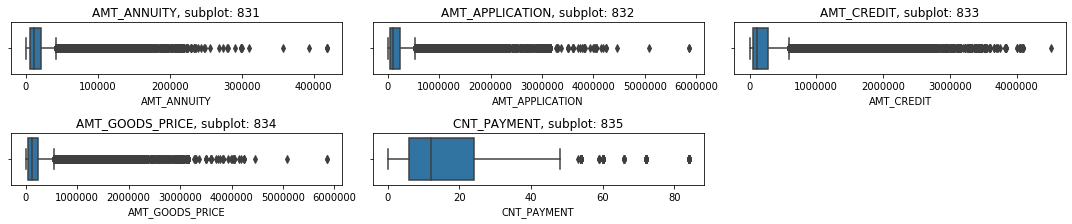

In [114]:
#  Float Data
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in Previous_df.columns:
    if Previous_df[i].dtypes=="float64" or Previous_df[i].dtypes=="float32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(Previous_df[i])
        c = c + 1

fig.tight_layout()
plt.show()

Continuous Variables seem to have high percentage of outliers. Checking distribution

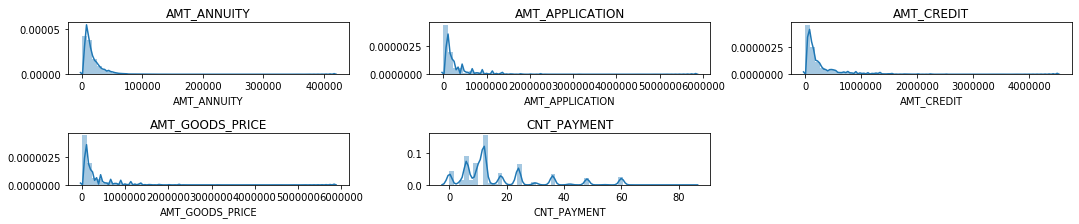

In [115]:
#  Float Data
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in Previous_df.columns:
    if Previous_df[i].dtypes=="float64" or Previous_df[i].dtypes=="float32" :
        plt.subplot(a, b, c)
        plt.title(i)
        plt.xlabel(i)
        sns.distplot(a=Previous_df[i])
        c = c + 1

fig.tight_layout()
plt.show()

##### **Few notable points**
    Continuous Variables seem to have high percentage of outliers. Box plot and distribution both signify the same.

### Outlier & Possible Treatment

In [116]:
#using zscore to find out Outliers (>97%)

for i in Previous_df.columns:
    if Previous_df[i].dtypes=="float64" or Previous_df[i].dtypes=="float32":
        print( i, ":", end= " ")
        print(Previous_df.iloc[np.where(np.abs(ss.zscore(Previous_df[i])>2))].shape, end=" ")
        print("Percentage of Outlier rows: ", round((Previous_df.iloc[np.where(np.abs(ss.zscore(Previous_df[i])>2))].shape[0]/Previous_df.shape[0]*100), 2))   

AMT_ANNUITY : (61959, 16) Percentage of Outlier rows:  4.97
AMT_APPLICATION : (75698, 16) Percentage of Outlier rows:  6.07
AMT_CREDIT : (69957, 16) Percentage of Outlier rows:  5.61
AMT_GOODS_PRICE : (75714, 16) Percentage of Outlier rows:  6.08
CNT_PAYMENT : (103224, 16) Percentage of Outlier rows:  8.28


These rows can be deleted considering the size of file. Not doing so, as it is not in scope of the project

## <font color=blue> Bivariate Analysis

### Categorical and Categorical Variable

In [117]:
#checking the dataframe 
Previous_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,FLAG_LAST_APPL_PER_CONTRACT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,Y,Approved,Repeater,POS,Country-wide,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,Y,Approved,Repeater,Cash,Contact center,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,Y,Approved,Repeater,Cash,Credit and cash offices,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,Y,Approved,Repeater,Cash,Credit and cash offices,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Y,Refused,Repeater,Cash,Credit and cash offices,XNA,24.0,high,Cash Street: high


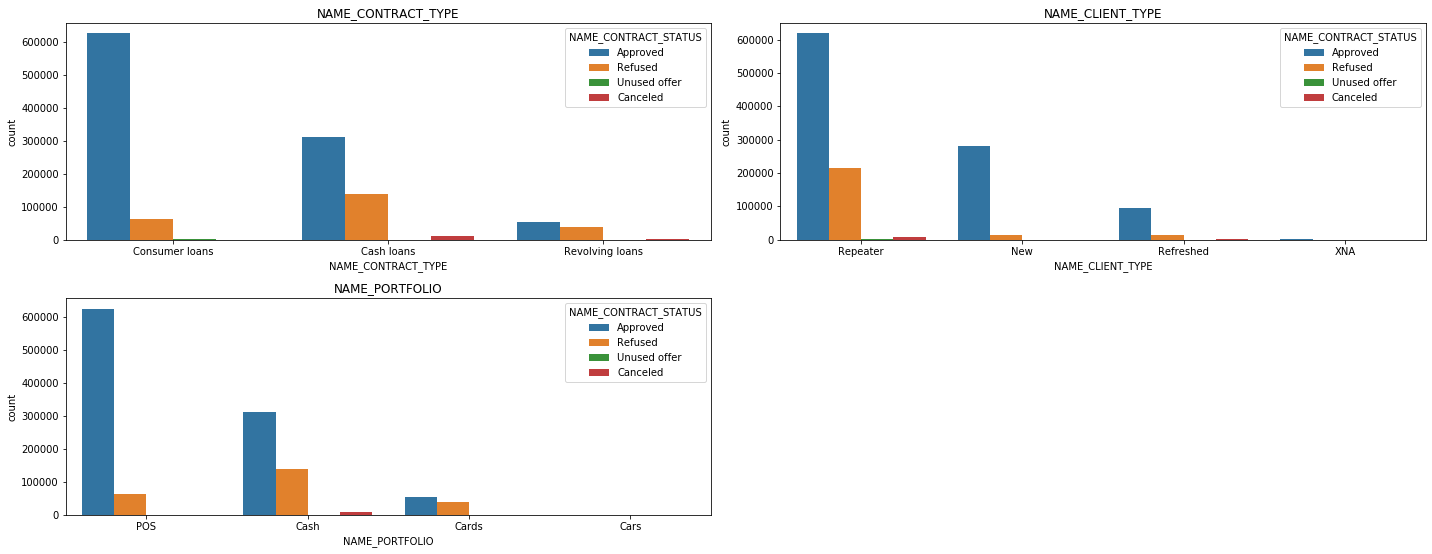

In [118]:
cols=['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO']


a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,15))

for i in cols:

    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.countplot(x=i, data=Previous_df, hue='NAME_CONTRACT_STATUS')
    c = c + 1

fig.tight_layout()
plt.show()

##### **Few notable points**
    1. In approved category, consumer loan has largest no of applicants. 
    2. There seem to be no cancelled loans in cash loan category than consumer loan.
    3. More cash loans have been refused than consumer loans.
    4. The bank has more repeaters in all approved, refused, unused, cancelled categories
    5. POS transactions seem to be consumer loans and similar to point 2 - more cash laons have been refused than POS.

## <font color = blue> Top Correlations

In [119]:
df_corr_prev=Previous_df.drop(axis=1,columns=['SK_ID_CURR','SK_ID_PREV'] )

correlation=df_corr_prev.corr().abs()

In [120]:
corr_prev = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_prev.columns=['Column1','Column2','Correlation']
corr_prev.dropna(subset=['Correlation'],inplace=True)
corr_prev = corr_prev.sort_values(by=['Correlation'], ascending=False)

corr_prev


,Column1,Column2,Correlation
16,AMT_GOODS_PRICE,AMT_APPLICATION,0.999883
17,AMT_GOODS_PRICE,AMT_CREDIT,0.993028
11,AMT_CREDIT,AMT_APPLICATION,0.992965
15,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895
5,AMT_APPLICATION,AMT_ANNUITY,0.820831
10,AMT_CREDIT,AMT_ANNUITY,0.814884
22,CNT_PAYMENT,AMT_CREDIT,0.700323
21,CNT_PAYMENT,AMT_APPLICATION,0.672276
23,CNT_PAYMENT,AMT_GOODS_PRICE,0.672129
20,CNT_PAYMENT,AMT_ANNUITY,0.401020


<Figure size 1440x576 with 0 Axes>

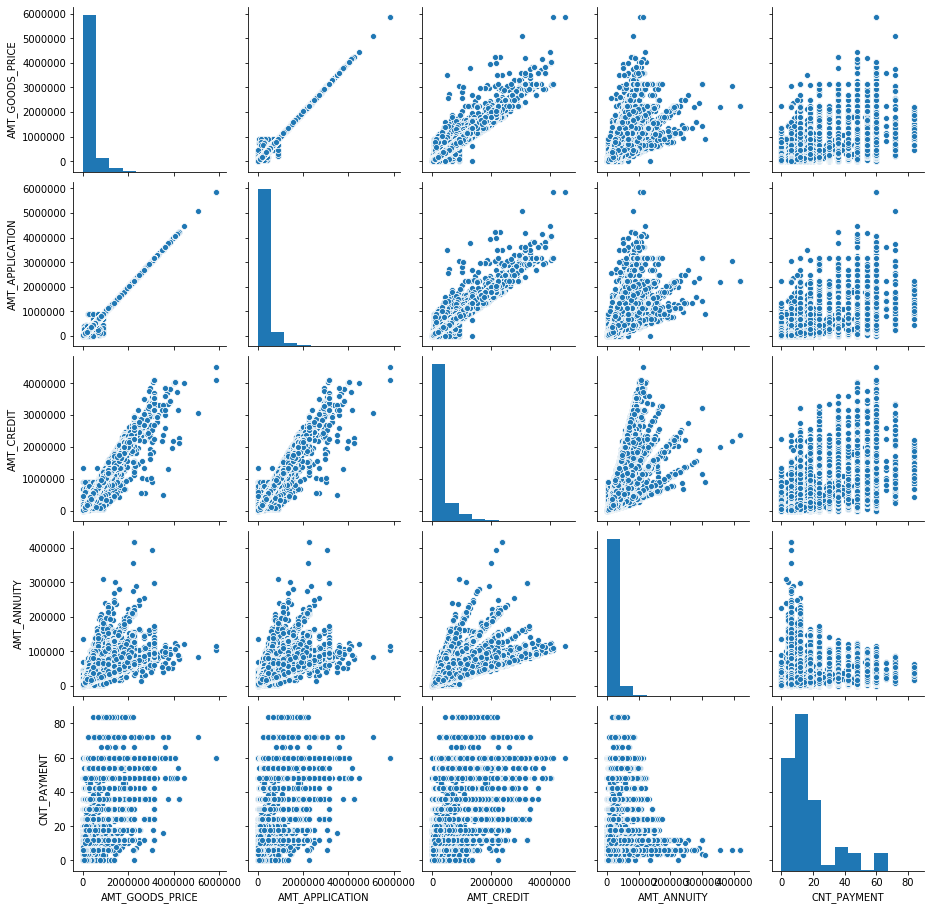

In [121]:
plt.figure(figsize=[20,8])
sns.pairplot(Previous_df[['AMT_GOODS_PRICE','AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT']])
plt.show()    
    

##### **Few notable points**
    1. AMT_GOODS_PRICE, AMT_ANNUITY, AMT_APPLICATION - as expected have high correlation. Higher the value of good purchased more there will be need of loan and surely all these will correlate
    2. Similary, AMT_Credit to AMT_GOOD_PRICE also the correlation is high
    3. Column CNT_Payment ideally should have had a high correlation with AMT_credit, ie higher credit, more the term of 
    loan. But no such correaltion can be seen.



## <font color=blue> Multivariate Analysis

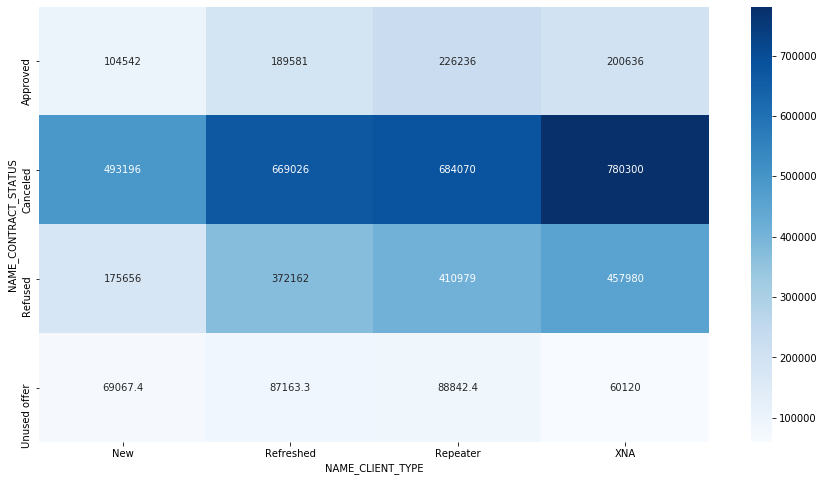

In [122]:
# Checking contract status vs name client type aggregating over application amount

result=pd.pivot_table(data=Previous_df, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
plt.figure(figsize=(15,8))
sns.heatmap(result, annot=True,cmap='Blues', fmt="g")
plt.show()

##### **Few notable points**
    1. Unused offer application amount is low
    2. Cancelled application amount is high. The bank may be refusing these possibly as the Debt liabiltiy ratio of consumer must be going high due to the high amount and thus credit defualt risk.
    3. Repreater's application amount is higeht than the New customers. This may indicate that the bank has more conducive         policies/rate of interest etc for repeat applicants

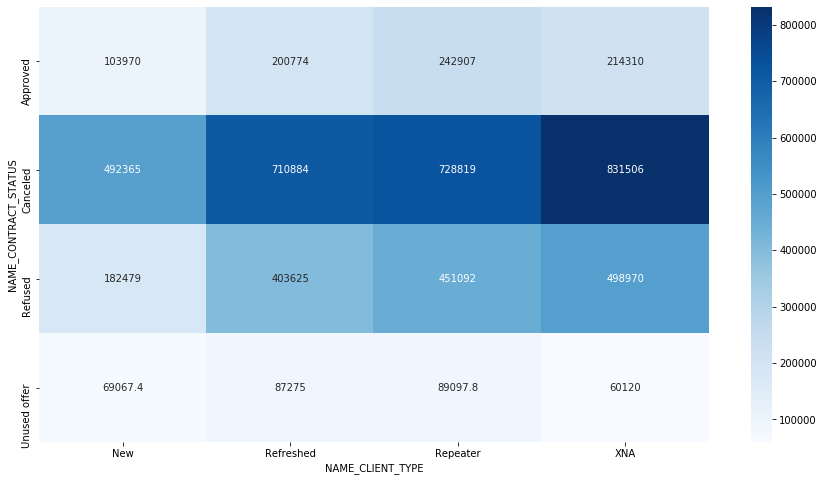

In [123]:
# Checking contract status vs name client type aggregating over AMT CREDIT

result1=pd.pivot_table(data=Previous_df, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_CREDIT')
plt.figure(figsize=(15,8))
sns.heatmap(result1, annot=True,cmap='Blues', fmt="g")
plt.show()

Few notable points
1. Unused offer CREDIT AMOUNT is low. This may be the reason for customer not using
2. Unable to understand why for cancelled and refused there should be any credit amount?

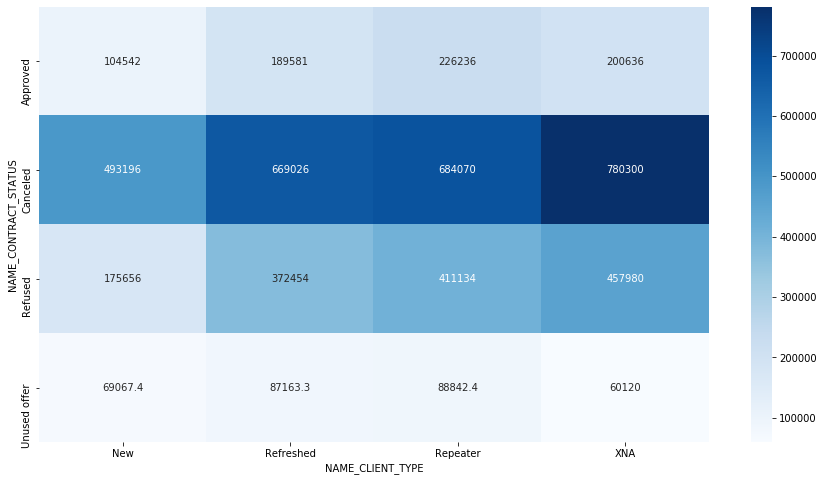

In [124]:
# Checking contract status vs name client type aggregating over AMOUNT GOOD PRICE

result3=pd.pivot_table(data=Previous_df, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_GOODS_PRICE')
plt.figure(figsize=(15,8))
sns.heatmap(result3, annot=True,cmap='Blues', fmt="g")
plt.show()

##### **Few notable points**
    1. All cancelled and refused cases have higher value of goods than other categories

# Merged Data files Analysis

In [125]:
#checking if any duplicate values in SK_ID_PREV
duplicate = Previous_df[Previous_df.duplicated(subset='SK_ID_CURR')]
duplicate.shape

(908809, 16)

SK_ID_CURR has duplicates in prev_df. Indicating that application file and previous application file will have a one to many relationship 

## <font color =blue> Merging two data frames, Data Loading and Inspection

In [126]:
inp0=pd.merge( application_df,Previous_df, how='left', on="SK_ID_CURR")
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NUM_DOCS,YRS_AGE,OWN_CAR_flag,OWN_REALTY_flag,AGE_GROUP,INCOME_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,2.0,10.0,6.0,0.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1,25,0,1,"(15, 25]",High,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,Y,Approved,New,POS,Stone,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,4.0,4.0,1.0,0.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1,45,0,0,"(35, 45]",VeryHigh,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,Y,Approved,Repeater,Cash,Credit and cash offices,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,4.0,4.0,1.0,0.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1,45,0,0,"(35, 45]",VeryHigh,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,Y,Approved,Refreshed,POS,Stone,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,4.0,4.0,1.0,0.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1,45,0,0,"(35, 45]",VeryHigh,2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,Y,Approved,Refreshed,POS,Country-wide,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1.0,12.0,7.0,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0,52,1,1,"(45, 55]",VeryLow,1564014.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,Y,Approved,New,POS,Regional / Local,Connectivity,4.0,middle,POS mobile without interest


In [127]:
#Checking shape of the file
inp0.shape

(952767, 73)

## <font color =blue> Analysis

# Plotting Name contract status to check % of default, ie Target 0 and 1

In [128]:
contract=inp0['NAME_CONTRACT_STATUS'].unique()
contract

array(['Approved', 'Refused', nan, 'Canceled', 'Unused offer'],
      dtype=object)

Target 0 and 1 for :  Approved
0    0.92685
1    0.07315
Name: TARGET, dtype: float64


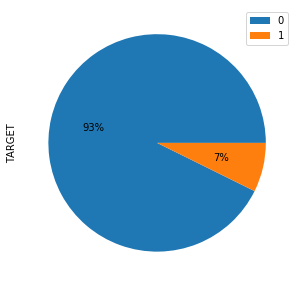

Target 0 and 1 for :  Refused
0    0.888632
1    0.111368
Name: TARGET, dtype: float64


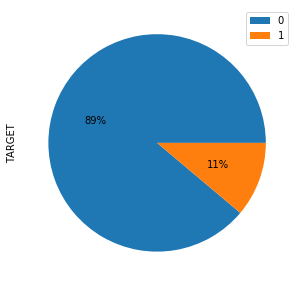

No handles with labels found to put in legend.


Target 0 and 1 for :  nan
Series([], Name: TARGET, dtype: float64)


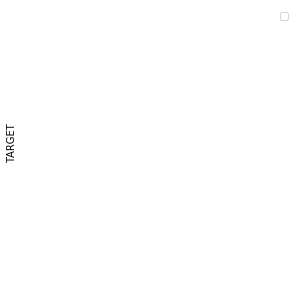

Target 0 and 1 for :  Canceled
0    0.920684
1    0.079316
Name: TARGET, dtype: float64


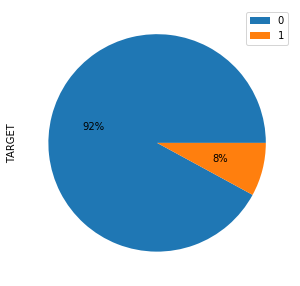

Target 0 and 1 for :  Unused offer
0    0.905405
1    0.094595
Name: TARGET, dtype: float64


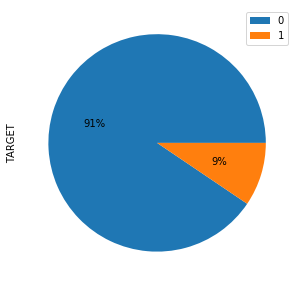

In [133]:
for i in contract:
    print("Target 0 and 1 for : ",i)
    plt.figure(figsize=[8,5])
    print(inp0[(inp0['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts(normalize=True))
    inp0[(inp0['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts().plot.pie(autopct='%1.00f%%',labeldistance=None)
    plt.legend()
    plt.show()

##### **Few notable points**
    1. 7% of Approved loans have defaults
    2. Previous applications with Refused, Cancelled, Unused loans also have default which is a matter of concern. This indicates that the financial company had Refused/cancelled previous application, but has approved the current and is facing default on these loans.

In [135]:
# Number of Defaults in approved cases
approvedDefault=inp0[(inp0['NAME_CONTRACT_STATUS']=="Approved") & (inp0['TARGET']==1)]
approvedDefault.shape

(54610, 73)

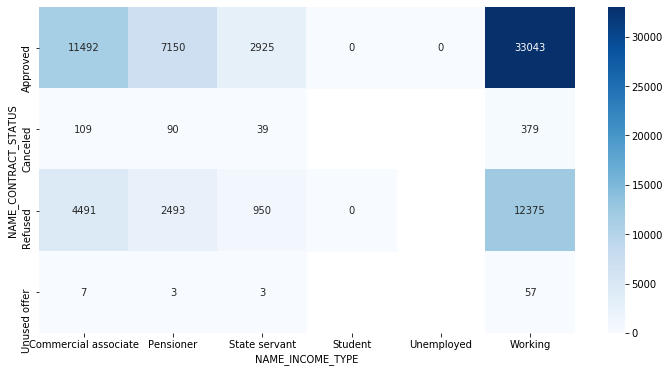

In [136]:
#Checking "NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE",aggregating on Target

res=pd.pivot_table(data=inp0,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

Few notable points
1. Since Target 1 is default, higher on the above matrix shows correlation to default.
2. Working applicant with Approved status have defaulted in highest numbers
3. Previous applications with Refused, Cancelled, Unused loans also have default which is a matter of concern. This indicates that the financial company had Refused/cancelled previous application, but has approved the current and is facing default on these loans.
4. 12,375 applicanst of working class were REFUSED earlier and now have defaulted.

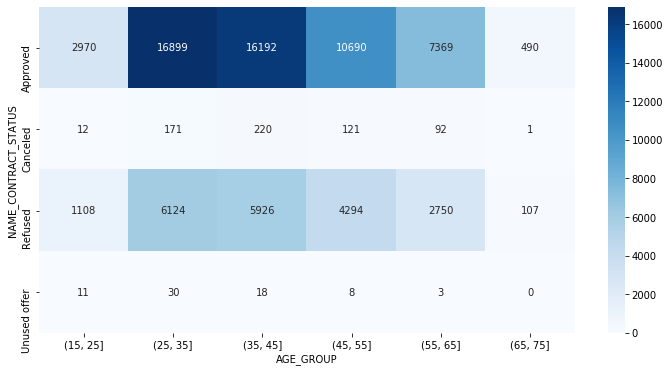

In [137]:
#Checking "NAME_CONTRACT_STATUS", "AGE_GROUP",aggregating on Target

res=pd.pivot_table(data=inp0,index="NAME_CONTRACT_STATUS",columns="AGE_GROUP",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

##### **Few notable points**
    1. Since Target 1 is default, higher on the above matrix shows correlation to default.
    2. Approved loans of age group 25-35 and 35-45 have higher defaults
    3. Refused, cancelled, loans in previous application have defaulted in current. 
  

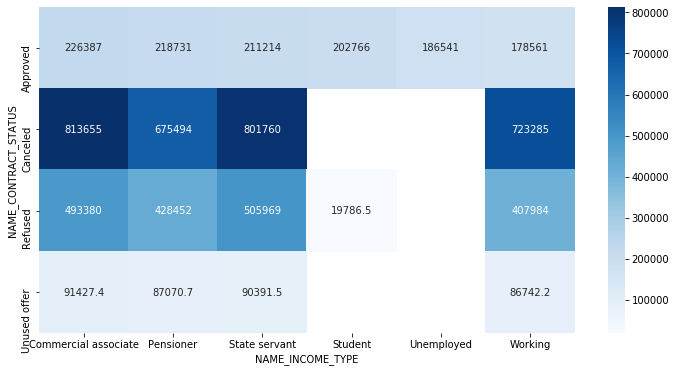

In [138]:
#Checking "NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE",aggregating on AMT_CREDIT

res=pd.pivot_table(data=inp0,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='AMT_CREDIT_y')
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

##### **Few notable points**
    1.Higher credot offered to unemployedis a notable factor
    2. Unused offers have smaller credit values and possibly the reason why applicant is not usign them

In [139]:
cols=['INCOME_GROUP','AGE_GROUP','CODE_GENDER','NAME_INCOME_TYPE','OCCUPATION_TYPE',"ORGANIZATION_TYPE",'OWN_CAR_flag','OWN_REALTY_flag' ]

for i in cols:
    print(approvedDefault[i].value_counts(normalize=True))
    print('\n')

Medium      0.310895
High        0.251328
Low         0.209083
VeryHigh    0.144754
VeryLow     0.083941
Name: INCOME_GROUP, dtype: float64


(25, 35]    0.309449
(35, 45]    0.296502
(45, 55]    0.195752
(55, 65]    0.134939
(15, 25]    0.054386
(65, 75]    0.008973
Name: AGE_GROUP, dtype: float64


F    0.597125
M    0.402875
Name: CODE_GENDER, dtype: float64


Working                 0.605072
Commercial associate    0.210438
Pensioner               0.130928
State servant           0.053562
Name: NAME_INCOME_TYPE, dtype: float64


Laborers                 0.315616
Sales staff              0.165165
Drivers                  0.110921
Core staff               0.088861
Managers                 0.074220
High skill tech staff    0.039902
Security staff           0.037271
Cooking staff            0.034269
Medicine staff           0.034269
Accountants              0.026924
Cleaning staff           0.024914
Low-skill Laborers       0.018139
Private service staff    0.009777
Waiters/barmen staf

#### <font color = red> **Default cases in Approved Applications"</font>
    All the below variables were established in analysis of Application dataframe as leading to default.
    Checked these against the approved application and default cases and it proves to be correct
  **Default High**<br>
        'INCOME_GROUP' - Medium income<br> 
        'AGE_GROUP - 25-35, followed by 35-45<br>
        'NAME_INCOME_TYPE' - Working <br>
        'OCCUPATION_TYPE' - Labourers 31%<br>
        'ORGANIZATION_TYPE' - Business type 3<br>
        'OWN_CAR_flag' - 31% dont have car<br>
        'OWN_REALTY_flag' - 70% dont have own home

# Case Summary
   
### *Defaulters' demography*
      -->All the below variables were established in analysis of Application dataframe as leading to default. 
    Checked these against the Approved loans which have defaults, and it proves to be correct
        -Medium income
        -25-35 years ols , followed by 35-45 years age group
        -Male
        -Unemployed
        -Labourers, Salesman, Drivers
        -Business type 3
        -Own House - No
    Other IMPORTANT Factors to be considered
        -Days last phone number changed - Lower figure points at concern
        -No of Bureau Hits in last week. Month etc – zero hits is good
        -Amount income not correspondingly equivalent to Good Bought – Income low and good value high is a concern
        -Previous applications with Refused, Cancelled, Unused loans also have default which is a matter of concern.   This indicates that the financial company had Refused/Cancelled previous application but has approved the current and is  facing default on these. 
        
### *Credible Applications refused*
    -Unused applications have lower loan amount. Is this the reason for no usage?
    -Female applicants should be given extra weightage as defaults are lesser.
    -60% of defaulters are Working applicants. This does not mean working applicants must be refused. Proper scrutiny of other parameters needed
    -Previous applications with Refused, Cancelled,Unused loans also have cases where payments are coming on time in current application. This indicates that possibly wrong decisions were done in those cases.